# Machine Learning to Predict College Level Math Success

#### Matched high school records of students enrolling in the California Community College System
Dalton, Beer, Kommanapalli

Import the dataset

In [1]:
import numpy as np
import pandas as pd

#importing the data 
MMAPMath = pd.read_csv('MathTransferLevel041718_SQL03.csv')
Math = MMAPMath

/Users/Harsha/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (388,390,391,392,397,399,400,401) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Drop redundant columns

In [2]:
# Note we are dropping the college course ID values, so we are only looking at whether or not the student was successful
# in their college course without considering what that college course was.
ExcludeColumns = ['hs_09_grade_level', 'hs_09_course_title', 'hs_09_course_grade', 'hs_09_course_grade_category', 
                  'hs_09_course_ag_code', 'hs_09_course_level_code', 'hs_09_course_type_code', 'hs_10_grade_level', 
                  'hs_10_course_title', 'hs_10_course_grade', 'hs_10_course_grade_category', 'hs_10_course_ag_code', 
                  'hs_10_course_level_code', 'hs_10_course_type_code', 'hs_11_grade_level', 'hs_11_course_title', 
                  'hs_11_course_grade', 'hs_11_course_grade_category', 'hs_11_course_ag_code', 'hs_11_course_level_code', 
                  'hs_11_course_type_code', 'hs_12_grade_level', 'hs_12_course_title', 'hs_12_course_grade', 
                  'hs_12_course_grade_category', 'hs_12_course_ag_code', 'hs_12_course_level_code', 'hs_12_course_type_code', 
                  'hs_recency_course_title', 'hs_recency_course_grade', 'hs_recency_course_grade_category', 
                  'hs_recency_course_ag_code', 'hs_recency_course_level_code', 'hs_recency_course_type_code', 
                  'cc_primacy_course_level', 'cc_primacy_course_id', 'cc_primacy_course_title', 'cc_primacy_course_grade', 
                  'cc_primacy_course_grade_category', 'cc_00_college_id', 'cc_00_course_level', 'cc_00_year_term_code', 
                  'cc_00_course_id', 'cc_00_course_title', 'cc_00_course_grade', 'cc_00_course_grade_points', 
                  'cc_00_course_grade_category', 'cc_01_college_id', 'cc_01_course_level', 'cc_01_year_term_code', 
                  'cc_01_course_id', 'cc_01_course_title', 'cc_01_course_grade', 'cc_01_course_grade_points', 
                  'cc_01_course_grade_category', 'cc_01_course_success_ind', 'cc_02_college_id', 'cc_02_course_level', 
                  'cc_02_year_term_code', 'cc_02_course_id', 'cc_02_course_title', 'cc_02_course_grade', 
                  'cc_02_course_grade_points', 'cc_02_course_grade_category', 'cc_02_course_success_ind', 
                  'cc_03_college_id', 'cc_03_course_level', 'cc_03_year_term_code', 'cc_03_course_id', 'cc_03_course_title', 
                  'cc_03_course_grade', 'cc_03_course_grade_points', 'cc_03_course_grade_category', 
                  'cc_03_course_success_ind', 'cc_04_college_id', 'cc_04_course_level', 'cc_04_year_term_code', 
                  'cc_04_course_id', 'cc_04_course_title', 'cc_04_course_grade', 'cc_04_course_grade_points', 
                  'cc_04_course_grade_category', 'cc_04_course_success_ind', 'CC_GE_MATH', 'CC_STATISTICS', 'CC_COLL_ALG', 
                  'CC_PRE_CALC', 'CC_CALC_I', 'CC_CALC_II', 'CC_BUS_MATH', 'CC_DIFF_EQ', 'CC_TRIG', 'CC_TRANSFER_MATH_TYPE',
                  'IsMmapStats', 'IsCapStats', 'IsMmapGeMath', 'IsCapGeMath', 'IsMmapCalc', 'IsCapCalc', 'IsMmapPreCalc', 
                  'IsCapPreCalc', 'IsMmapTrig', 'IsCapTrig', 'IsMmapColAlg', 'IsCapColAlg', 'IsMmapIntAlg', 'IsCapIntAlg', 
                  'IsMmapElmAlg', 'IsCapElmAlg','IsTransferStem', 'IsTransferNonStem', 'IsDsps', 
                  'IsEops', 'CohortYear', 'StudentID', 'cc_primacy_course_success_ind',  'cc_primacy_college_id', 
                  'cc_primacy_year_term_code', 'cc_primacy_course_grade_points',]
Math = Math.drop(ExcludeColumns, axis = 1)
ExcludeColumns2 = ['hs_09_school_code', 'hs_09_year_term_code', 'hs_09_course_id', 
                   'hs_10_school_code', 'hs_10_year_term_code', 'hs_10_course_id',  
                   'hs_11_school_code', 'hs_11_year_term_code', 'hs_11_course_id',  
                   'hs_12_school_code', 'hs_12_year_term_code', 'hs_12_course_id',  
                   'hs_recency_grade_level', 'hs_recency_school_code', 'hs_recency_year_term_code', 'hs_recency_course_id', 
                   'hs_recency_course_grade_points', 'hs_recency_course_success_ind', 'hs_pre_alg_UP11', 
                   'hs_stat_ANY_Bplus', 'hs_stat_ANY_Aminus', 'hs_stat_ANY_A', 'hs_stat_ap_UP11', 'hs_stat_ap_UP11_F', 
                   'hs_stat_ap_UP11_Dminus', 'hs_stat_ap_UP11_D', 'hs_stat_ap_UP11_Dplus', 'hs_stat_ap_UP11_Cminus', 
                   'hs_stat_ap_UP11_C', 'hs_stat_ap_UP11_Cplus', 'hs_stat_ap_UP11_Bminus', 'hs_stat_ap_UP11_B', 
                   'hs_stat_ap_UP11_Bplus', 'hs_stat_ap_UP11_Aminus', 'hs_stat_ap_UP11_A', 'hs_stat_ap_ANY', 
                   'hs_stat_ap_ANY_F', 'hs_stat_ap_ANY_Dminus', 'hs_stat_ap_ANY_D', 'hs_stat_ap_ANY_Dplus', 
                   'hs_stat_ap_ANY_Cminus', 'hs_stat_ap_ANY_C', 'hs_stat_ap_ANY_Cplus', 'hs_stat_ap_ANY_Bminus', 
                   'hs_stat_ap_ANY_B', 'hs_stat_ap_ANY_Bplus', 'hs_stat_ap_ANY_Aminus', 'hs_stat_ap_ANY_A', 
                   'hs_calc_bc_ANY_Cplus', 'hs_calc_bc_ANY_Bminus', 'hs_calc_bc_ANY_B', 
                   'hs_calc_bc_ANY_Bplus', 'hs_calc_bc_ANY_Aminus', 'hs_calc_bc_ANY_A', 'hs_stat_UP11', 'hs_stat_UP11_F', 
                   'hs_stat_UP11_Dminus', 'hs_stat_UP11_D', 'hs_stat_UP11_Dplus', 'hs_stat_UP11_Cminus', 'hs_stat_UP11_C', 
                   'hs_stat_UP11_Cplus', 'hs_stat_UP11_Bminus', 'hs_stat_UP11_B', 'hs_stat_UP11_Bplus', 
                   'hs_stat_UP11_Aminus', 'hs_stat_UP11_A', 'hs_stat_ANY', 'hs_stat_ANY_F', 'hs_stat_ANY_Dminus', 
                   'hs_stat_ANY_D', 'hs_stat_ANY_Dplus', 'hs_stat_ANY_Cminus', 'hs_stat_ANY_C', 'hs_stat_ANY_Cplus', 
                   'hs_stat_ANY_Bminus', 'hs_stat_ANY_B', 'hs_pre_alg_UP11_F', 'hs_pre_alg_UP11_Dminus', 
                   'hs_pre_alg_UP11_D', 'hs_pre_alg_UP11_Dplus', 'hs_pre_alg_UP11_Cminus', 'hs_pre_alg_UP11_C', 
                   'hs_pre_alg_UP11_Cplus', 'hs_pre_alg_UP11_Bminus', 'hs_pre_alg_UP11_B', 'hs_pre_alg_UP11_Bplus', 
                   'hs_pre_alg_UP11_Aminus', 'hs_pre_alg_UP11_A', 'hs_pre_alg_ANY', 'hs_pre_alg_ANY_F', 
                   'hs_pre_alg_ANY_Dminus', 'hs_pre_alg_ANY_D', 'hs_pre_alg_ANY_Dplus', 'hs_pre_alg_ANY_Cminus', 
                   'hs_pre_alg_ANY_C', 'hs_pre_alg_ANY_Cplus', 'hs_pre_alg_ANY_Bminus', 'hs_pre_alg_ANY_B', 
                   'hs_pre_alg_ANY_Bplus', 'hs_pre_alg_ANY_Aminus', 'hs_pre_alg_ANY_A', 'hs_alg_i_UP11', 'hs_alg_i_UP11_F', 
                   'hs_alg_i_UP11_Dminus', 'hs_alg_i_UP11_D', 'hs_alg_i_UP11_Dplus', 'hs_alg_i_UP11_Cminus',
                   'hs_alg_i_UP11_C', 'hs_alg_i_UP11_Cplus', 'hs_alg_i_UP11_Bminus', 'hs_alg_i_UP11_B',
                   'hs_alg_i_UP11_Bplus', 'hs_alg_i_UP11_Aminus', 'hs_alg_i_UP11_A', 'hs_alg_i_ANY', 'hs_alg_i_ANY_F',
                   'hs_alg_i_ANY_Dminus', 'hs_alg_i_ANY_D', 'hs_alg_i_ANY_Dplus', 'hs_alg_i_ANY_Cminus', 'hs_alg_i_ANY_C',
                   'hs_alg_i_ANY_Cplus', 'hs_alg_i_ANY_Bminus', 'hs_alg_i_ANY_B', 'hs_alg_i_ANY_Bplus',
                   'hs_alg_i_ANY_Aminus', 'hs_alg_i_ANY_A', 'hs_alg_ii_UP11', 'hs_alg_ii_UP11_F', 'hs_alg_ii_UP11_Dminus',
                   'hs_calc_ab_ANY_Dplus', 'hs_calc_ab_ANY_Cminus', 'hs_calc_ab_ANY_C', 'hs_calc_ab_ANY_Cplus',
                   'hs_calc_ab_ANY_Bminus', 'hs_calc_ab_ANY_B', 'hs_calc_ab_ANY_Bplus', 'hs_calc_ab_ANY_Aminus',
                   'hs_calc_ab_ANY_A', 'hs_calc_bc_UP11', 'hs_calc_bc_UP11_F', 'hs_calc_bc_UP11_Dminus',
                   'hs_calc_bc_UP11_D', 'hs_calc_bc_UP11_Dplus', 'hs_calc_bc_UP11_Cminus', 'hs_calc_bc_UP11_C',
                   'hs_calc_bc_UP11_Cplus', 'hs_calc_bc_UP11_Bminus', 'hs_calc_bc_UP11_B', 'hs_calc_bc_UP11_Bplus',
                   'hs_calc_bc_UP11_Aminus', 'hs_calc_bc_UP11_A', 'hs_calc_bc_ANY', 'hs_calc_bc_ANY_F',
                   'hs_calc_bc_ANY_Dminus', 'hs_calc_bc_ANY_D', 'hs_calc_bc_ANY_Dplus', 'hs_calc_bc_ANY_Cminus',
                   'hs_calc_bc_ANY_C', 'hs_alg_ii_UP11_D', 'hs_alg_ii_UP11_Dplus', 'hs_alg_ii_UP11_Cminus', 
                   'hs_alg_ii_UP11_C', 'hs_alg_ii_UP11_Cplus', 'hs_alg_ii_UP11_Bminus', 'hs_alg_ii_UP11_B', 
                   'hs_alg_ii_UP11_Bplus', 'hs_alg_ii_UP11_Aminus', 'hs_alg_ii_UP11_A', 'hs_alg_ii_ANY', 'hs_alg_ii_ANY_F', 
                   'hs_alg_ii_ANY_Dminus', 'hs_alg_ii_ANY_D', 'hs_alg_ii_ANY_Dplus', 'hs_alg_ii_ANY_Cminus', 
                   'hs_alg_ii_ANY_C', 'hs_alg_ii_ANY_Cplus', 'hs_alg_ii_ANY_Bminus', 'hs_alg_ii_ANY_B', 
                   'hs_alg_ii_ANY_Bplus', 'hs_alg_ii_ANY_Aminus', 'hs_alg_ii_ANY_A', 'hs_geo_UP11', 'hs_geo_UP11_F', 
                   'hs_geo_UP11_Dminus', 'hs_geo_UP11_D', 'hs_calc_ANY_F', 'hs_calc_ANY_Dminus', 'hs_calc_ANY_D', 
                   'hs_calc_ANY_Dplus', 'hs_calc_ANY_Cminus', 'hs_calc_ANY_C', 'hs_calc_ANY_Cplus', 'hs_calc_ANY_Bminus', 
                   'hs_calc_ANY_B', 'hs_calc_ANY_Bplus', 'hs_calc_ANY_Aminus', 'hs_calc_ANY_A', 'hs_calc_ab_UP11', 
                   'hs_calc_ab_UP11_F', 'hs_calc_ab_UP11_Dminus', 'hs_calc_ab_UP11_D', 'hs_calc_ab_UP11_Dplus', 
                   'hs_calc_ab_UP11_Cminus', 'hs_calc_ab_UP11_C', 'hs_calc_ab_UP11_Cplus', 'hs_calc_ab_UP11_Bminus', 
                   'hs_calc_ab_UP11_B', 'hs_calc_ab_UP11_Bplus', 'hs_calc_ab_UP11_Aminus', 'hs_calc_ab_UP11_A', 
                   'hs_calc_ab_ANY', 'hs_calc_ab_ANY_F', 'hs_calc_ab_ANY_Dminus', 'hs_calc_ab_ANY_D', 'hs_geo_UP11_Dplus', 
                   'hs_geo_UP11_Cminus', 'hs_geo_UP11_C', 'hs_geo_UP11_Cplus', 'hs_geo_UP11_Bminus', 'hs_geo_UP11_B', 
                   'hs_geo_UP11_Bplus', 'hs_geo_UP11_Aminus', 'hs_geo_UP11_A', 'hs_geo_ANY', 'hs_geo_ANY_F', 
                   'hs_geo_ANY_Dminus', 'hs_geo_ANY_D', 'hs_geo_ANY_Dplus', 'hs_geo_ANY_Cminus', 'hs_geo_ANY_C', 
                   'hs_geo_ANY_Cplus', 'hs_geo_ANY_Bminus', 'hs_geo_ANY_B', 'hs_geo_ANY_Bplus', 'hs_geo_ANY_Aminus', 
                   'hs_geo_ANY_A', 'hs_trig_UP11', 'hs_trig_UP11_F', 'hs_trig_UP11_Dminus', 'hs_trig_UP11_D', 
                   'hs_trig_UP11_Dplus', 'hs_pre_calc_UP11_Aminus', 'hs_pre_calc_UP11_A', 'hs_pre_calc_ANY', 
                   'hs_pre_calc_ANY_F', 'hs_pre_calc_ANY_Dminus', 'hs_pre_calc_ANY_D', 'hs_pre_calc_ANY_Dplus', 
                   'hs_pre_calc_ANY_Cminus', 'hs_pre_calc_ANY_C', 'hs_pre_calc_ANY_Cplus', 'hs_pre_calc_ANY_Bminus', 
                   'hs_pre_calc_ANY_B', 'hs_pre_calc_ANY_Bplus', 'hs_pre_calc_ANY_Aminus', 'hs_pre_calc_ANY_A', 
                   'hs_calc_UP11', 'hs_calc_UP11_F', 'hs_calc_UP11_Dminus', 'hs_calc_UP11_D', 'hs_calc_UP11_Dplus', 
                   'hs_calc_UP11_Cminus', 'hs_calc_UP11_C', 'hs_calc_UP11_Cplus', 'hs_calc_UP11_Bminus', 'hs_calc_UP11_B', 
                   'hs_calc_UP11_Bplus', 'hs_calc_UP11_Aminus', 'hs_calc_UP11_A', 'hs_calc_ANY', 'hs_trig_UP11_Cminus', 
                   'hs_trig_UP11_C', 'hs_trig_UP11_Cplus', 'hs_trig_UP11_Bminus', 'hs_trig_UP11_B', 'hs_trig_UP11_Bplus', 
                   'hs_trig_UP11_Aminus', 'hs_trig_UP11_A', 'hs_trig_ANY', 'hs_trig_ANY_F', 'hs_trig_ANY_Dminus', 
                   'hs_trig_ANY_D', 'hs_trig_ANY_Dplus', 'hs_trig_ANY_Cminus', 'hs_trig_ANY_C', 'hs_trig_ANY_Cplus', 
                   'hs_trig_ANY_Bminus', 'hs_trig_ANY_B', 'hs_trig_ANY_Bplus', 'hs_trig_ANY_Aminus', 'hs_trig_ANY_A', 
                   'hs_pre_calc_UP11', 'hs_pre_calc_UP11_F', 'hs_pre_calc_UP11_Dminus', 'hs_pre_calc_UP11_D', 
                   'hs_pre_calc_UP11_Dplus', 'hs_pre_calc_UP11_Cminus', 'hs_pre_calc_UP11_C', 'hs_pre_calc_UP11_Cplus', 
                   'hs_pre_calc_UP11_Bminus', 'hs_pre_calc_UP11_B', 'hs_pre_calc_UP11_Bplus', "IpedsRace", "Gender"]
Math = Math.drop(ExcludeColumns2, axis = 1)
#ExcludeColumns3 = ['hs_09_course_success_ind', 'hs_10_course_success_ind', 'hs_11_course_success_ind', 'hs_09_course_grade_points', 'hs_10_course_grade_points', 'hs_11_course_grade_points', 'hs_12_course_grade_points']
#Math = Math.drop(ExcludeColumns3, axis = 1)

In [3]:
#Math = pd.get_dummies(Math, columns=["IpedsRace", "Gender"])

In [4]:
# Check Count
Math.shape[0]

45657

Remove Nan's

In [5]:
# Remove NAN's
Math.dropna(inplace=True)

In [6]:
# Check Count
Math.shape[0]

20762

Quick check of the dataset

In [7]:
# Print summary statistics of data that exist in dataframe
Math.describe()

,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,hs_09_course_grade_points,hs_09_course_success_ind,hs_10_course_grade_points,hs_10_course_success_ind,hs_11_course_grade_points,hs_11_course_success_ind,hs_12_course_grade_points,hs_12_course_success_ind,cc_00_course_success_ind
count,20762.000000,20762.000000,20762.000000,20762.000000,20762.000000,20762.000000,20762.00000,20762.000000,20762.000000,20762.000000,20762.000000,20762.000000
mean,3.060881,2.712360,3.133126,2.900125,0.911088,2.692612,0.88214,2.563091,0.853530,2.406339,0.823283,0.640449
std,0.489841,0.661302,0.486729,1.015262,0.284624,1.049360,0.32245,1.088938,0.353585,1.098856,0.381438,0.479880
min,0.711000,0.000000,0.730000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.736000,2.250000,2.820000,2.000000,1.000000,2.000000,1.00000,2.000000,1.000000,1.700000,1.000000,0.000000
50%,3.094000,2.714000,3.179000,3.000000,1.000000,3.000000,1.00000,2.700000,1.000000,2.700000,1.000000,1.000000
75%,3.425750,3.200000,3.500000,4.000000,1.000000,3.700000,1.00000,3.300000,1.000000,3.000000,1.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.00000,4.000000,1.000000,4.000000,1.000000,1.000000


Check column types

In [8]:
Math.dtypes

OverallCumulativeGradePointAverage                  float64
SubjectCumulativeGradePointAverage                  float64
WithoutSubjectOverallCumulativeGradePointAverage    float64
hs_09_course_grade_points                           float64
hs_09_course_success_ind                            float64
hs_10_course_grade_points                           float64
hs_10_course_success_ind                            float64
hs_11_course_grade_points                           float64
hs_11_course_success_ind                            float64
hs_12_course_grade_points                           float64
hs_12_course_success_ind                            float64
cc_00_course_success_ind                              int64
dtype: object

Check how many of each response we have

In [9]:
Math.shape

(20762, 12)

In [10]:
Math.shape[0]

20762

In [11]:
Math['cc_00_course_success_ind'].value_counts()

1    13297
0     7465
Name: cc_00_course_success_ind, dtype: int64

Graphic Visualization of Important Variables

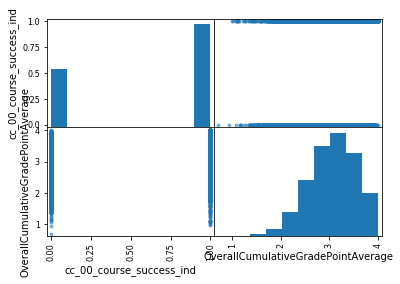

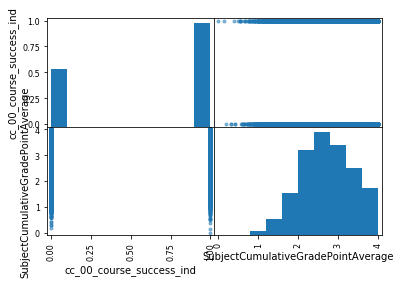

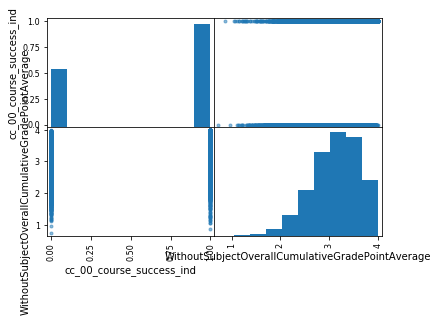

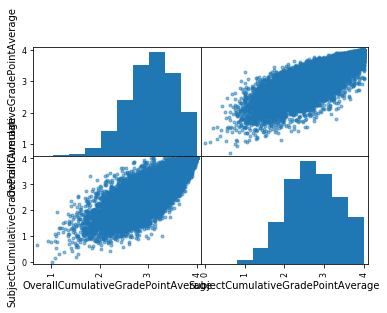

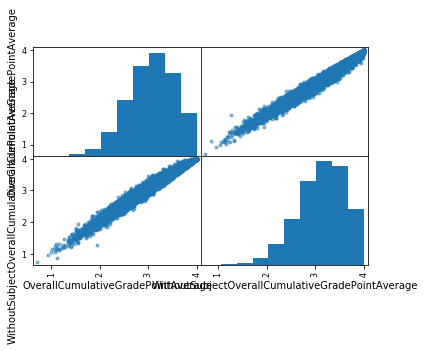

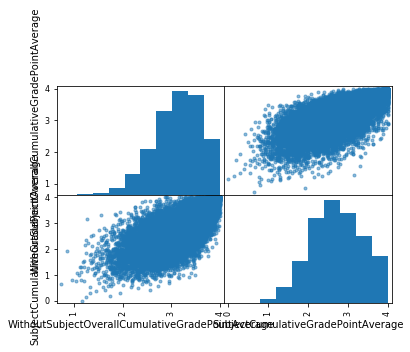

In [12]:
import matplotlib
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
matplotlib.interactive(True)

scatter_matrix(Math[['cc_00_course_success_ind', 'OverallCumulativeGradePointAverage']]) 
scatter_matrix(Math[['cc_00_course_success_ind', 'SubjectCumulativeGradePointAverage']]) 
scatter_matrix(Math[['cc_00_course_success_ind', 'WithoutSubjectOverallCumulativeGradePointAverage']]) 
scatter_matrix(Math[['OverallCumulativeGradePointAverage', 'SubjectCumulativeGradePointAverage']]) 
scatter_matrix(Math[['OverallCumulativeGradePointAverage', 'WithoutSubjectOverallCumulativeGradePointAverage']])
scatter_matrix(Math[['WithoutSubjectOverallCumulativeGradePointAverage', 'SubjectCumulativeGradePointAverage']]) 

plt.show()

### This is where Harsha's code starts

In [13]:
from scipy.stats import gaussian_kde
import numpy as np

def samplestrat(df, stratifying_column_name, num_to_sample, maxrows_to_est = 15000, bw_per_range = 50.0, eval_points = 1000 ):
    '''Take a sample of dataframe df stratified by stratifying_column_name
    '''
    strat_col_values = df[stratifying_column_name].values
    samplcol = (df.sample(maxrows_to_est)  if df.shape[0] > maxrows_to_est else df  )[stratifying_column_name].values
    vmin, vmax = min(samplcol), max(samplcol)
    pts = np.linspace(vmin,vmax  ,eval_points) 
    kernel = gaussian_kde( samplcol , bw_method = float(  (vmax - vmin)/bw_per_range  )   )
    density_estim_full = np.interp(strat_col_values, pts , kernel.evaluate(pts) )
    return df.sample(n=num_to_sample, weights = 1/(density_estim_full))

In [14]:
Z0_stratified_sample = samplestrat(Math, 'cc_00_course_success_ind',15000)

In [15]:
Z0_stratified_sample['cc_00_course_success_ind'].value_counts()

1    8657
0    6343
Name: cc_00_course_success_ind, dtype: int64

In [16]:
# seperate our target variable from our main data set to use with sci-kit learn
# delete target variable from df containing main data set
df_target = Z0_stratified_sample[['cc_00_course_success_ind']]
del Z0_stratified_sample['cc_00_course_success_ind']
df_target.head()

,cc_00_course_success_ind
7258,1
12065,1
36454,1
2524,1
44885,0


In [17]:
df_target.shape[0]

15000

In [18]:
# set the variables to X and y for easier reading
X = Z0_stratified_sample
y = df_target

In [19]:
X.shape[0]

15000

In [20]:
X.describe()

,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,hs_09_course_grade_points,hs_09_course_success_ind,hs_10_course_grade_points,hs_10_course_success_ind,hs_11_course_grade_points,hs_11_course_success_ind,hs_12_course_grade_points,hs_12_course_success_ind
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.038992,2.685547,3.112184,2.875453,0.906667,2.665640,0.876333,2.533727,0.845733,2.374067,0.815533
std,0.493026,0.663486,0.490318,1.023798,0.290909,1.054925,0.329212,1.094763,0.361216,1.102857,0.387877
min,0.936000,0.143000,0.861000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.712000,2.225000,2.794000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.700000,1.000000
50%,3.069000,2.688000,3.155500,3.000000,1.000000,3.000000,1.000000,2.700000,1.000000,2.300000,1.000000
75%,3.407000,3.163000,3.486000,3.700000,1.000000,3.700000,1.000000,3.300000,1.000000,3.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,4.000000,1.000000,4.000000,1.000000


In [21]:
y['cc_00_course_success_ind'].value_counts()

1    8657
0    6343
Name: cc_00_course_success_ind, dtype: int64

In [22]:
from sklearn.model_selection import ShuffleSplit
num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None)


### Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics as mt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

nb_clf_m = GaussianNB()
iter_num=0
# the indices are the rows used for training and testing in each iteration
accuracy_runs = []

for train_indices, test_indices in cv_object.split(X,y): 
    
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    X_train = X_m[train_indices]
   
    y_train = y_m[train_indices]
    
    y_train = np.ravel(y_train)
    
    X_test = X_m[test_indices]
    y_test = y_m[test_indices]
    y_test = np.ravel(y_test)
    #sm = SMOTE(random_state=12, ratio = 1.0)
    #sm.fit_sample(X_train, y_train)
    
    nb_clf_m.fit(X_train, y_train)
    y_hat_m = nb_clf_m.predict(X_test)
    
    acc = mt.accuracy_score(y_test,y_hat_m)
    accuracy_runs.append(acc)
    conf = mt.confusion_matrix(y_test,y_hat_m)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    precision, recall, fscore, support = score(y_test, y_hat_m)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    iter_num+=1

print ('average accuracy: ', np.array(accuracy_runs).mean())

====Iteration 0  ====
accuracy 0.6256666666666667
confusion matrix
 [[ 658  595]
 [ 528 1219]]
precision: [0.55480607 0.67199559]
recall: [0.52513966 0.6977676 ]
fscore: [0.5395654  0.68463915]
support: [1253 1747]
====Iteration 1  ====
accuracy 0.641
confusion matrix
 [[ 698  569]
 [ 508 1225]]
precision: [0.5787728  0.68283166]
recall: [0.55090766 0.70686671]
fscore: [0.56449656 0.69464134]
support: [1267 1733]
====Iteration 2  ====
accuracy 0.657
confusion matrix
 [[ 698  597]
 [ 432 1273]]
precision: [0.61769912 0.68074866]
recall: [0.53899614 0.74662757]
fscore: [0.5756701  0.71216783]
support: [1295 1705]
====Iteration 3  ====
accuracy 0.6423333333333333
confusion matrix
 [[ 660  587]
 [ 486 1267]]
precision: [0.57591623 0.68338727]
recall: [0.52927025 0.72276098]
fscore: [0.55160886 0.70252287]
support: [1247 1753]
====Iteration 4  ====
accuracy 0.653
confusion matrix
 [[ 728  556]
 [ 485 1231]]
precision: [0.60016488 0.68886402]
recall: [0.56697819 0.71736597]
fscore: [0.583099

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
import numpy as np
lr_clf_m = LogisticRegression(penalty='l2', C=1.0, class_weight=None)
iter_num=0
# the indices are the rows used for training and testing in each iteration
accuracy_runs = []

for train_indices, test_indices in cv_object.split(X,y):  
    
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    X_train = X_m[train_indices]
   
    y_train = y_m[train_indices]
    
    y_train = np.ravel(y_train)
    
    X_test = X_m[test_indices]
    y_test = y_m[test_indices]
    y_test = np.ravel(y_test)
    #sm = SMOTE(random_state=12, ratio = 1.0)
    #sm.fit_sample(X_train, y_train)
    
    lr_clf_m.fit(X_train, y_train)
    y_hat_m = lr_clf_m.predict(X_test)
    
    acc = mt.accuracy_score(y_test,y_hat_m)
    accuracy_runs.append(acc)
    conf = mt.confusion_matrix(y_test,y_hat_m)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    precision, recall, fscore, support = score(y_test, y_hat_m)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    iter_num+=1

print ('average accuracy: ', np.array(accuracy_runs).mean())

====Iteration 0  ====
accuracy 0.6503333333333333
confusion matrix
 [[ 610  703]
 [ 346 1341]]
precision: [0.63807531 0.65606654]
recall: [0.46458492 0.79490219]
fscore: [0.5376818  0.71884213]
support: [1313 1687]
====Iteration 1  ====
accuracy 0.651
confusion matrix
 [[ 559  695]
 [ 352 1394]]
precision: [0.61361142 0.66730493]
recall: [0.44577352 0.79839633]
fscore: [0.51639723 0.72698827]
support: [1254 1746]
====Iteration 2  ====
accuracy 0.654
confusion matrix
 [[ 589  676]
 [ 362 1373]]
precision: [0.61934805 0.67008297]
recall: [0.46561265 0.79135447]
fscore: [0.53158845 0.7256871 ]
support: [1265 1735]
====Iteration 3  ====
accuracy 0.6636666666666666
confusion matrix
 [[ 586  660]
 [ 349 1405]]
precision: [0.62673797 0.68038741]
recall: [0.47030498 0.80102623]
fscore: [0.53736818 0.73579471]
support: [1246 1754]
====Iteration 4  ====
accuracy 0.6516666666666666
confusion matrix
 [[ 588  674]
 [ 371 1367]]
precision: [0.61313869 0.66976972]
recall: [0.4659271  0.78653625]
fsco

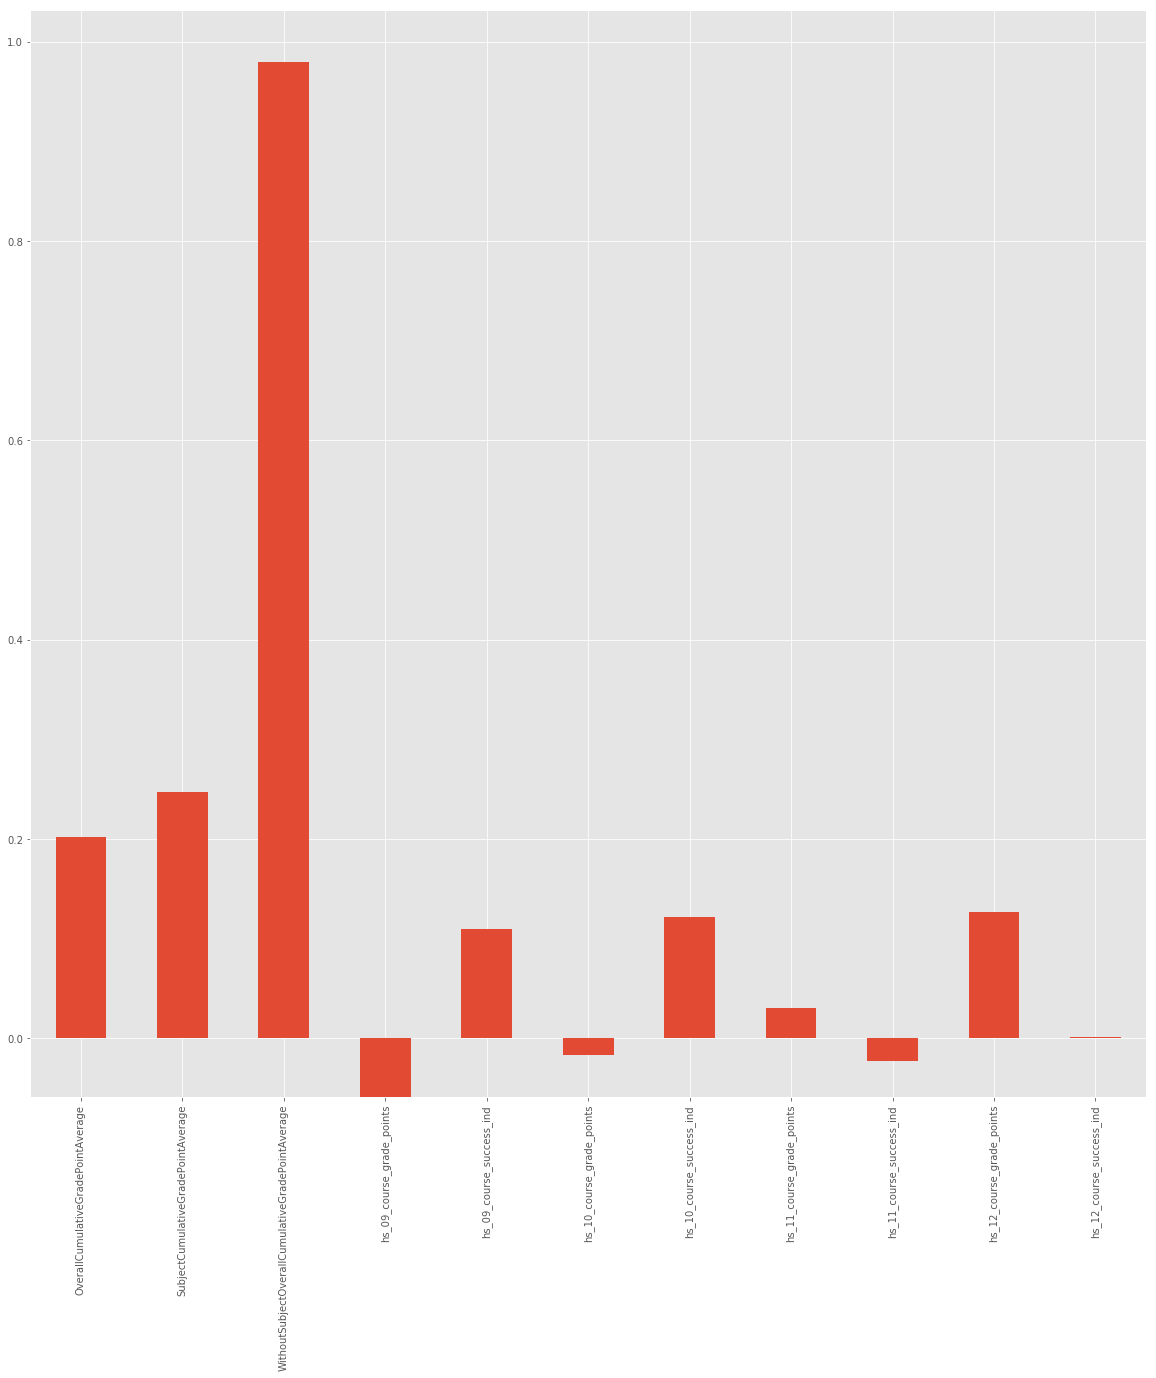

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
weights = pd.Series(lr_clf_m.coef_[0],index=Z0_stratified_sample.columns)
weights.plot(kind='bar',figsize=(20,20))
plt.show()

In [26]:
#ANN

In [27]:
import tensorflow as tf          # Just in case Keras doesn't work great

In [28]:
len_X=int(X.shape[1])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify=y)

############################ Apply StandardScalar transformation##############
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
#ANN Starts here#############################################################################################

from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 138 , kernel_initializer = 'uniform', activation = 'relu', input_dim = len_X))

#Add three more  hidden  layers
classifier.add(Dense(275, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(11, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(7, kernel_initializer='uniform', activation='sigmoid'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
########################### Implement EarlyStopping ##########################################
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# Fit classifier
#classifier.fit(np.array(X_train), np.array(y_train), batch_size = 32, epochs = 100,validation_split=0.2, callbacks=[early_stopping])
classifier.fit(np.array(X_train), np.array(y_train), batch_size = 32, epochs = 5,validation_split=0.2)
######################################### Predict on X_test ####################
y_pred = classifier.predict(X_test)
######################################### Calculate the score ####################
score = classifier.evaluate(np.array(X_test), np.array(y_test), batch_size=10)

print("%s: %.2f%%" % (classifier.metrics_names[1], (score[1]*100 + score[0]*100)/2 ) )




print("Score:", score)

Using TensorFlow backend.


Train on 9600 samples, validate on 2400 samples
Epoch 1/5
9600/9600 [==============================] - 1s 149us/step - loss: 0.6513 - acc: 0.6238 - val_loss: 0.6419 - val_acc: 0.6462

precision: [0.61058924 0.69710224]
recall: [0.56343578 0.73656846]
fscore: [0.58606557 0.71629213]
support: [1269 1731]
[[   0 1269]
 [   0 1731]]
precision [0.577      0.57685895 0.57671781 ... 1.         1.         1.        ]
recall [1.        0.9994223 0.9988446 ... 0.0028885 0.0023108 0.       ]
thresholds [0.3740926  0.3740927  0.37409282 ... 0.82952434 0.82954884 0.8296514 ]
Average precision-recall score: 0.76


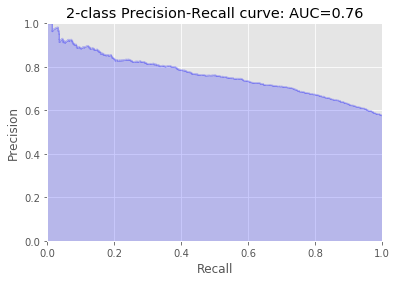

In [30]:

#################################################################################
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred>0.5)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))


######################################### Confusion Matrix ####################

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred>.3)
#print("summary",classifier.metrics_names)
print (cm.view())

######################### Precision Recall Curve################
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
print('precision', precision)
print('recall', recall)
print('thresholds',thresholds)
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))
################################################


### SVM

In [31]:
from sklearn.preprocessing import StandardScaler

scl_obj = StandardScaler()

/Users/Harsha/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy 0.639
confusion matrix
[[ 541  714]
 [ 369 1376]]


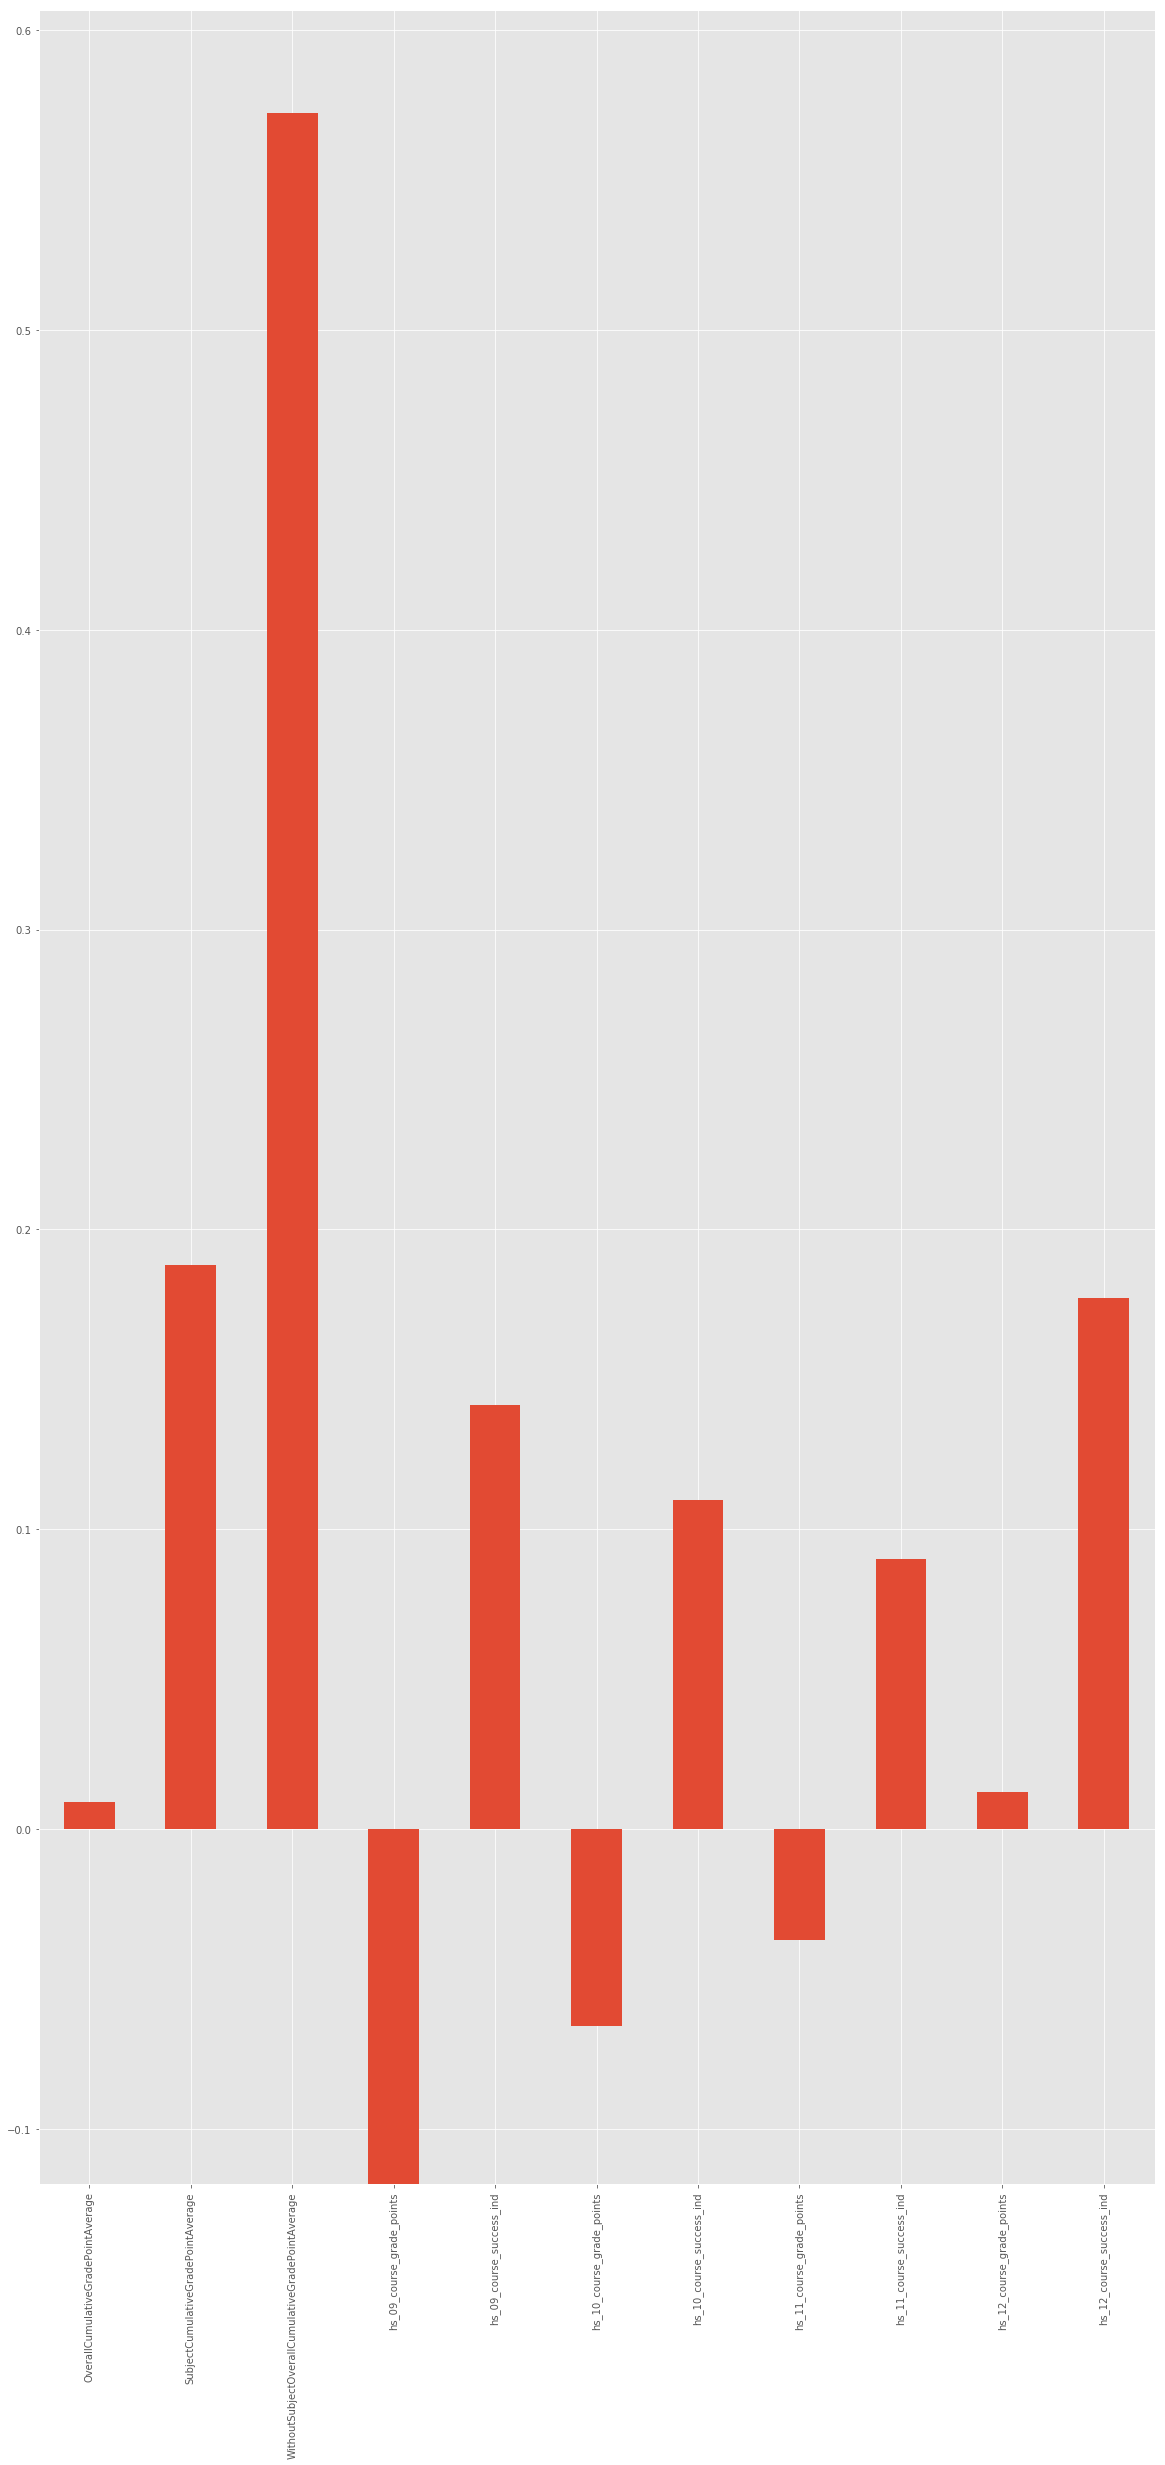

accuracy 0.6473333333333333
confusion matrix
[[ 556  721]
 [ 337 1386]]


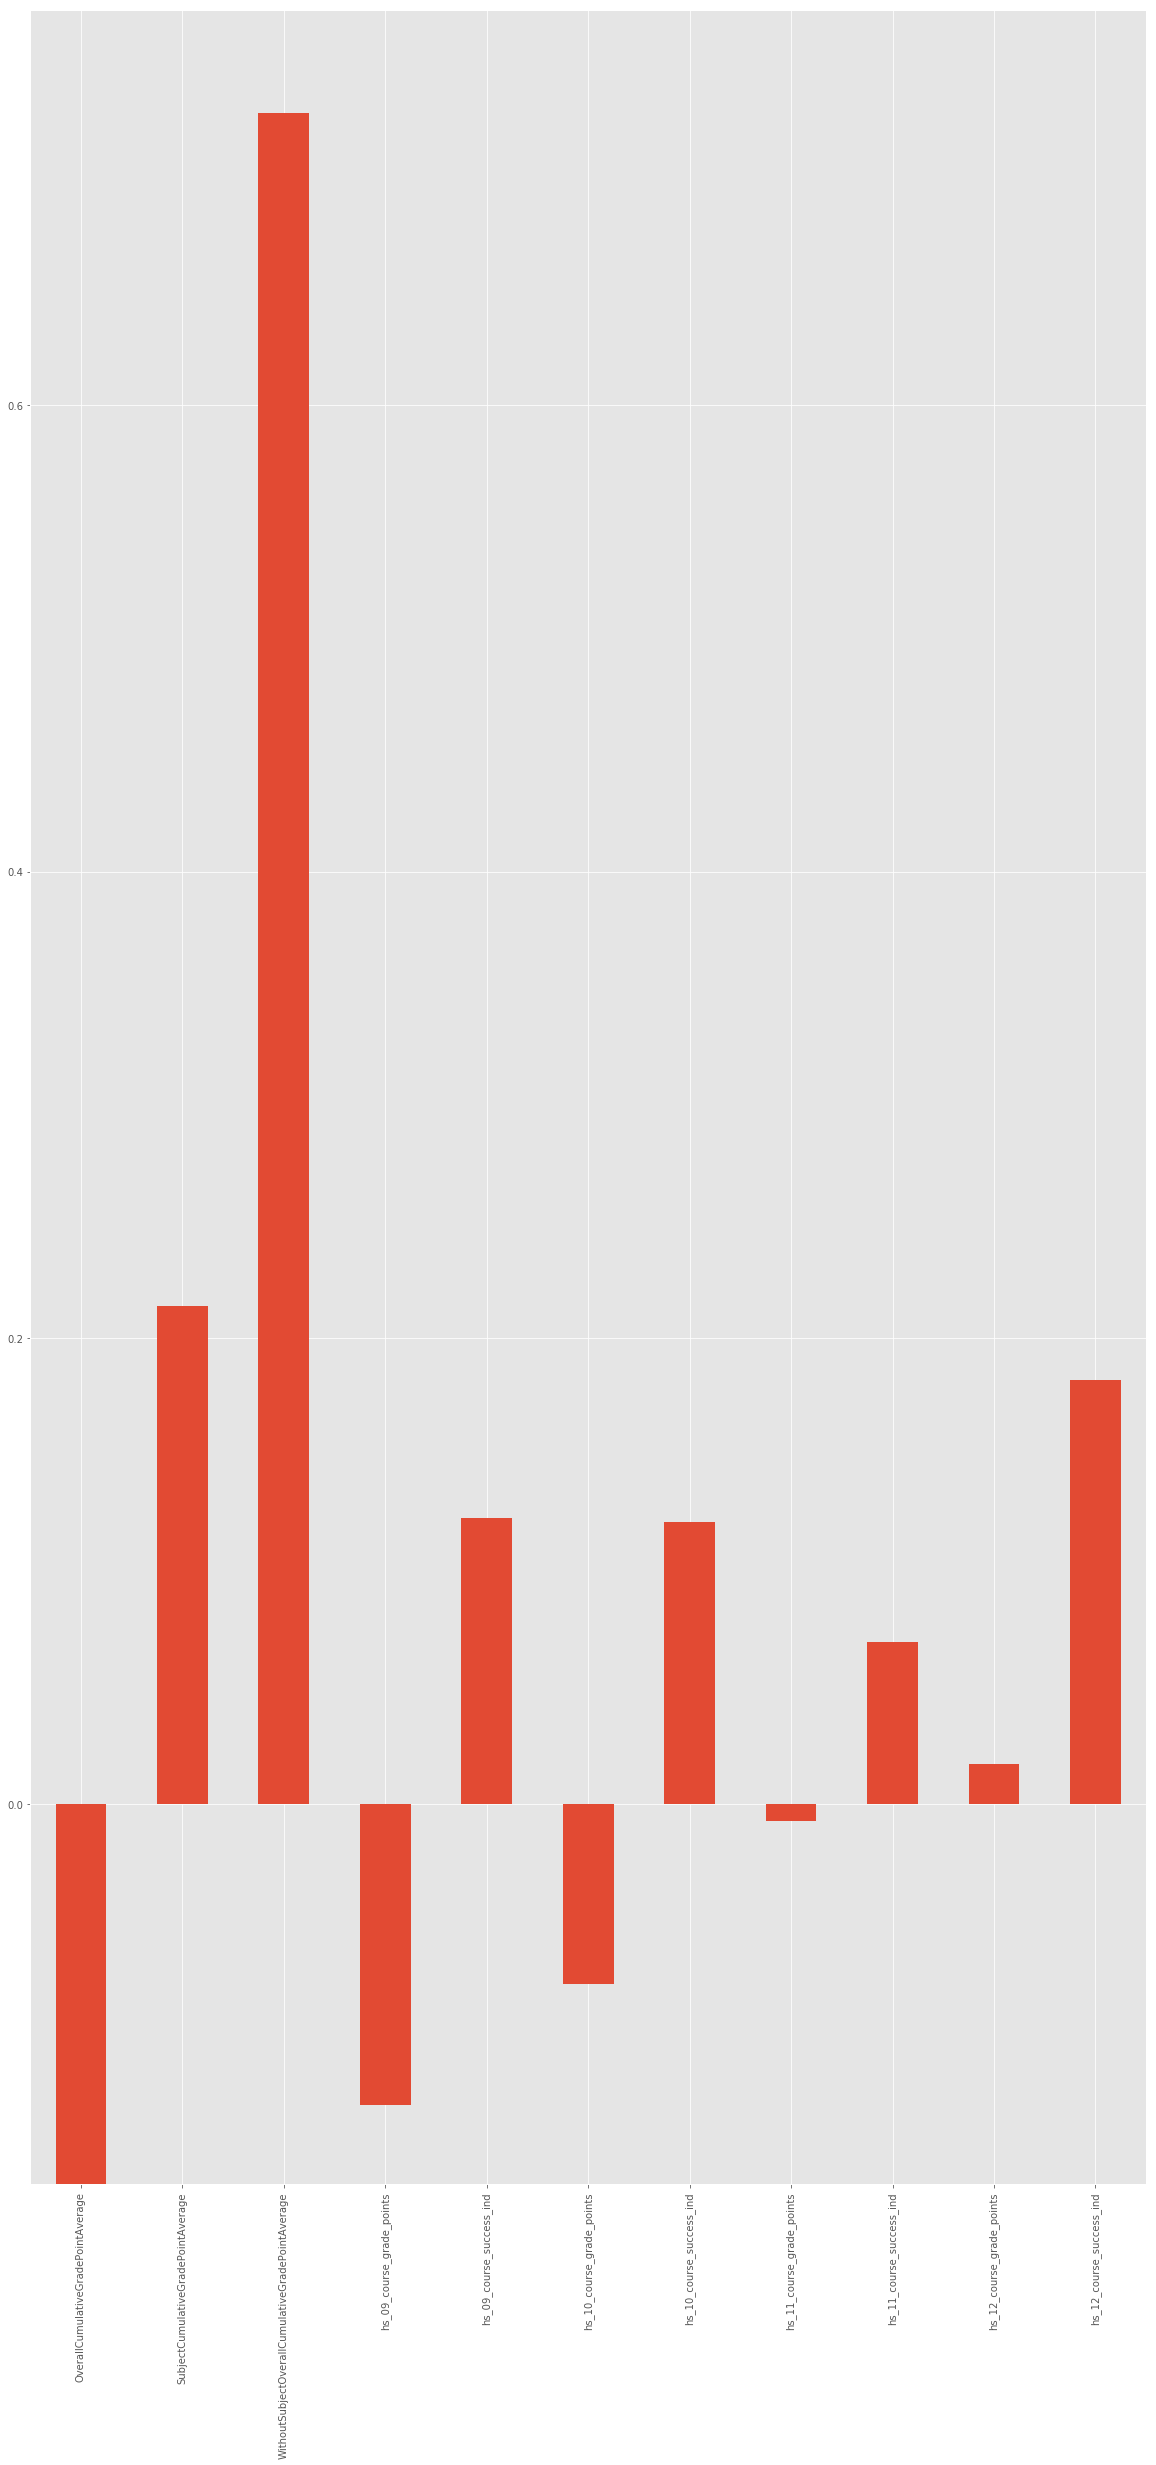

accuracy 0.6513333333333333
confusion matrix
[[ 553  740]
 [ 306 1401]]


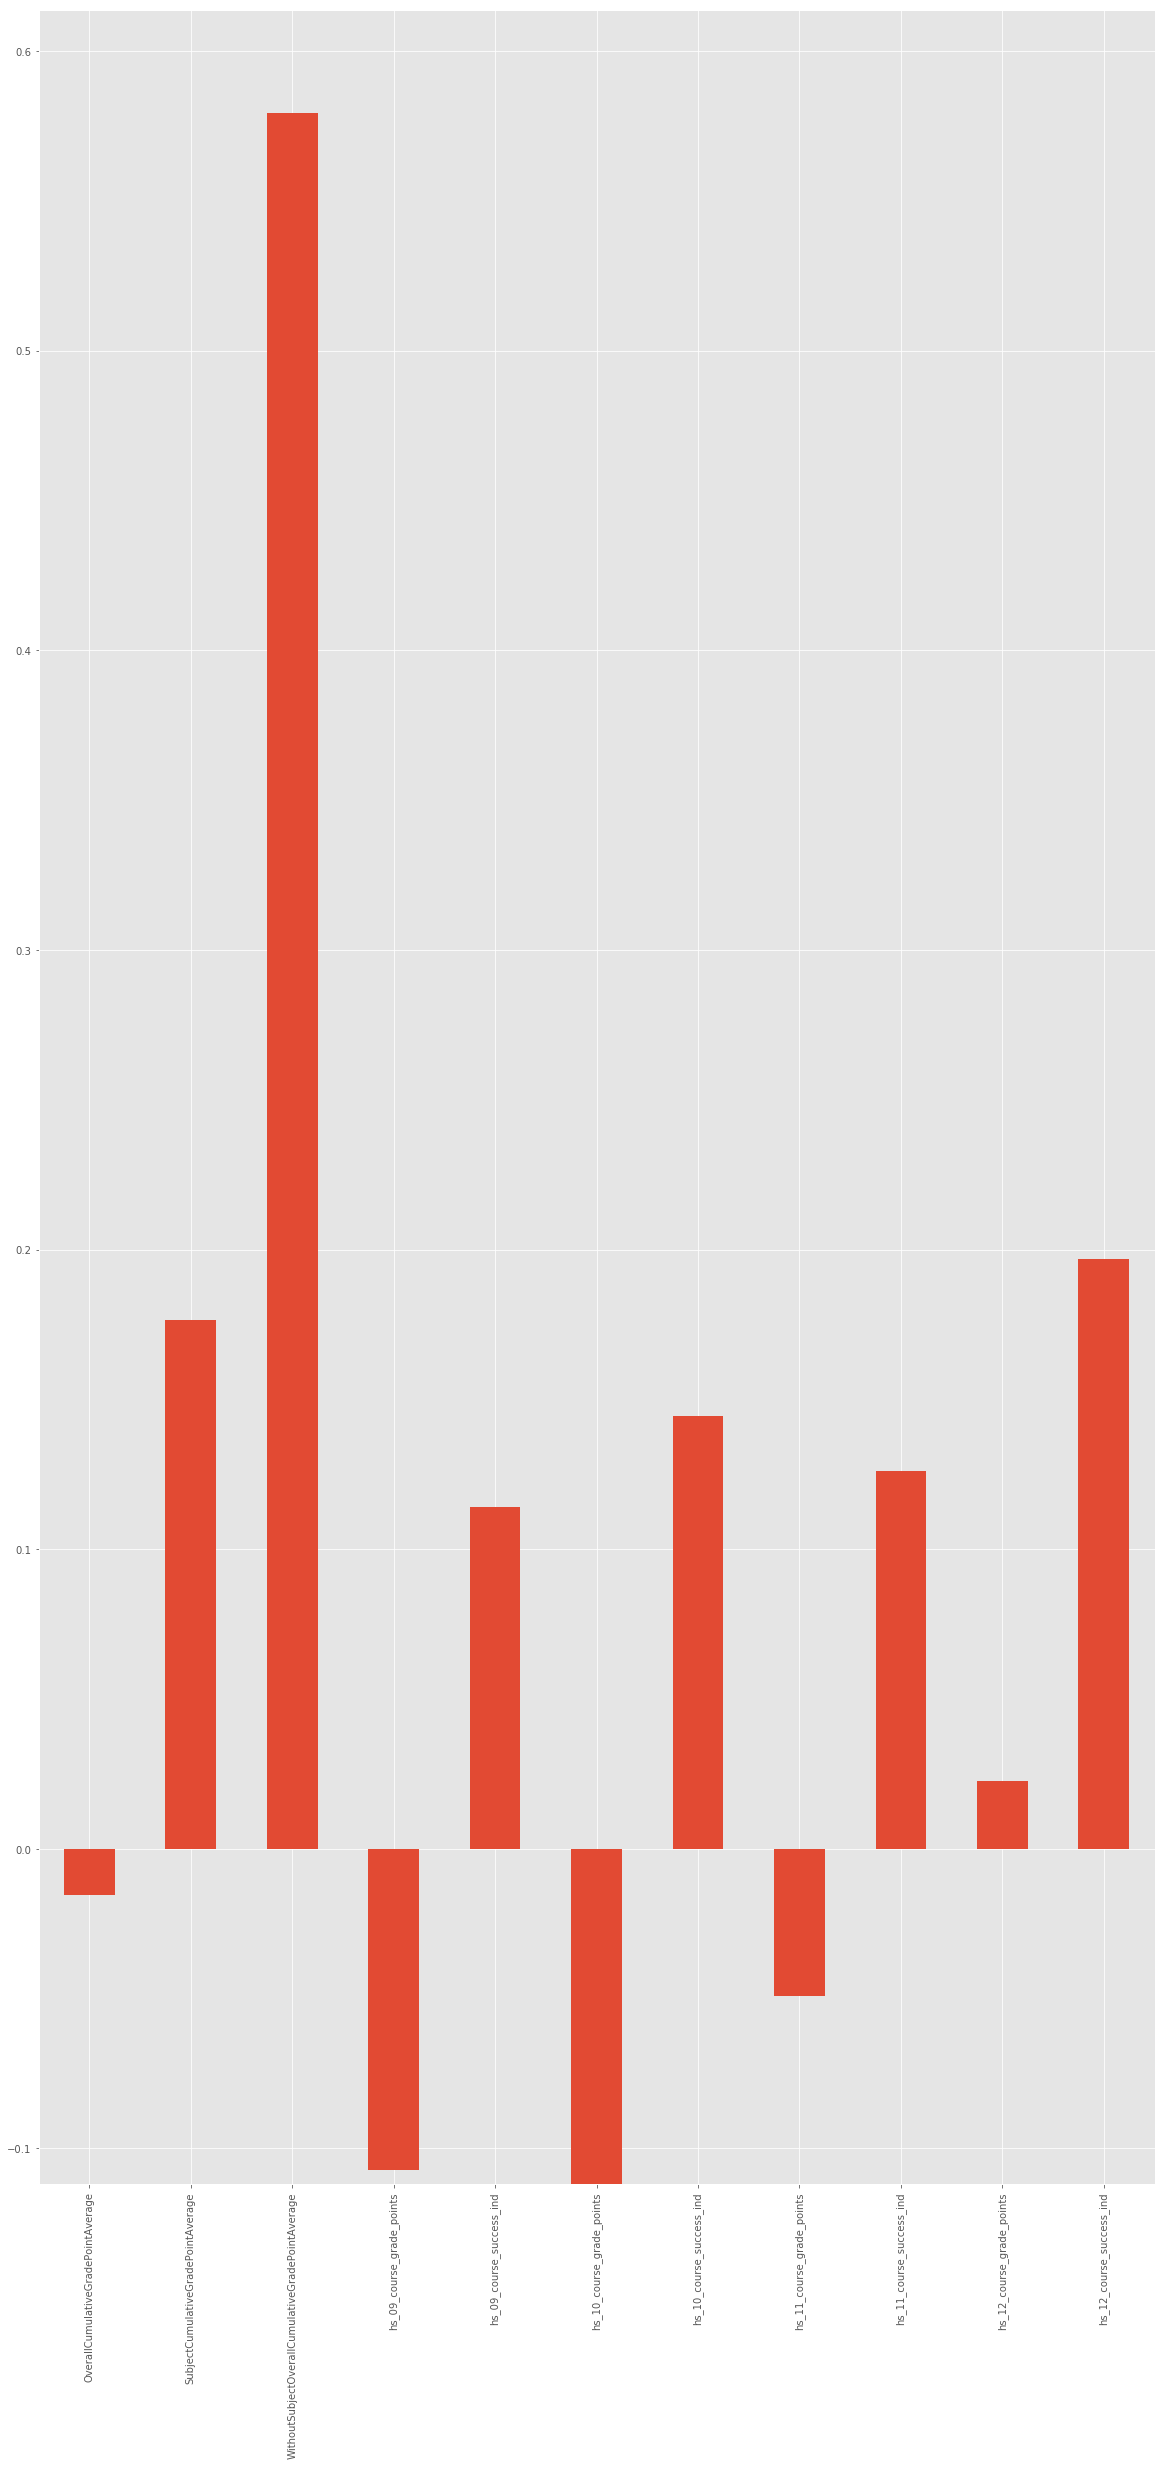

accuracy 0.6503333333333333
confusion matrix
[[ 594  704]
 [ 345 1357]]


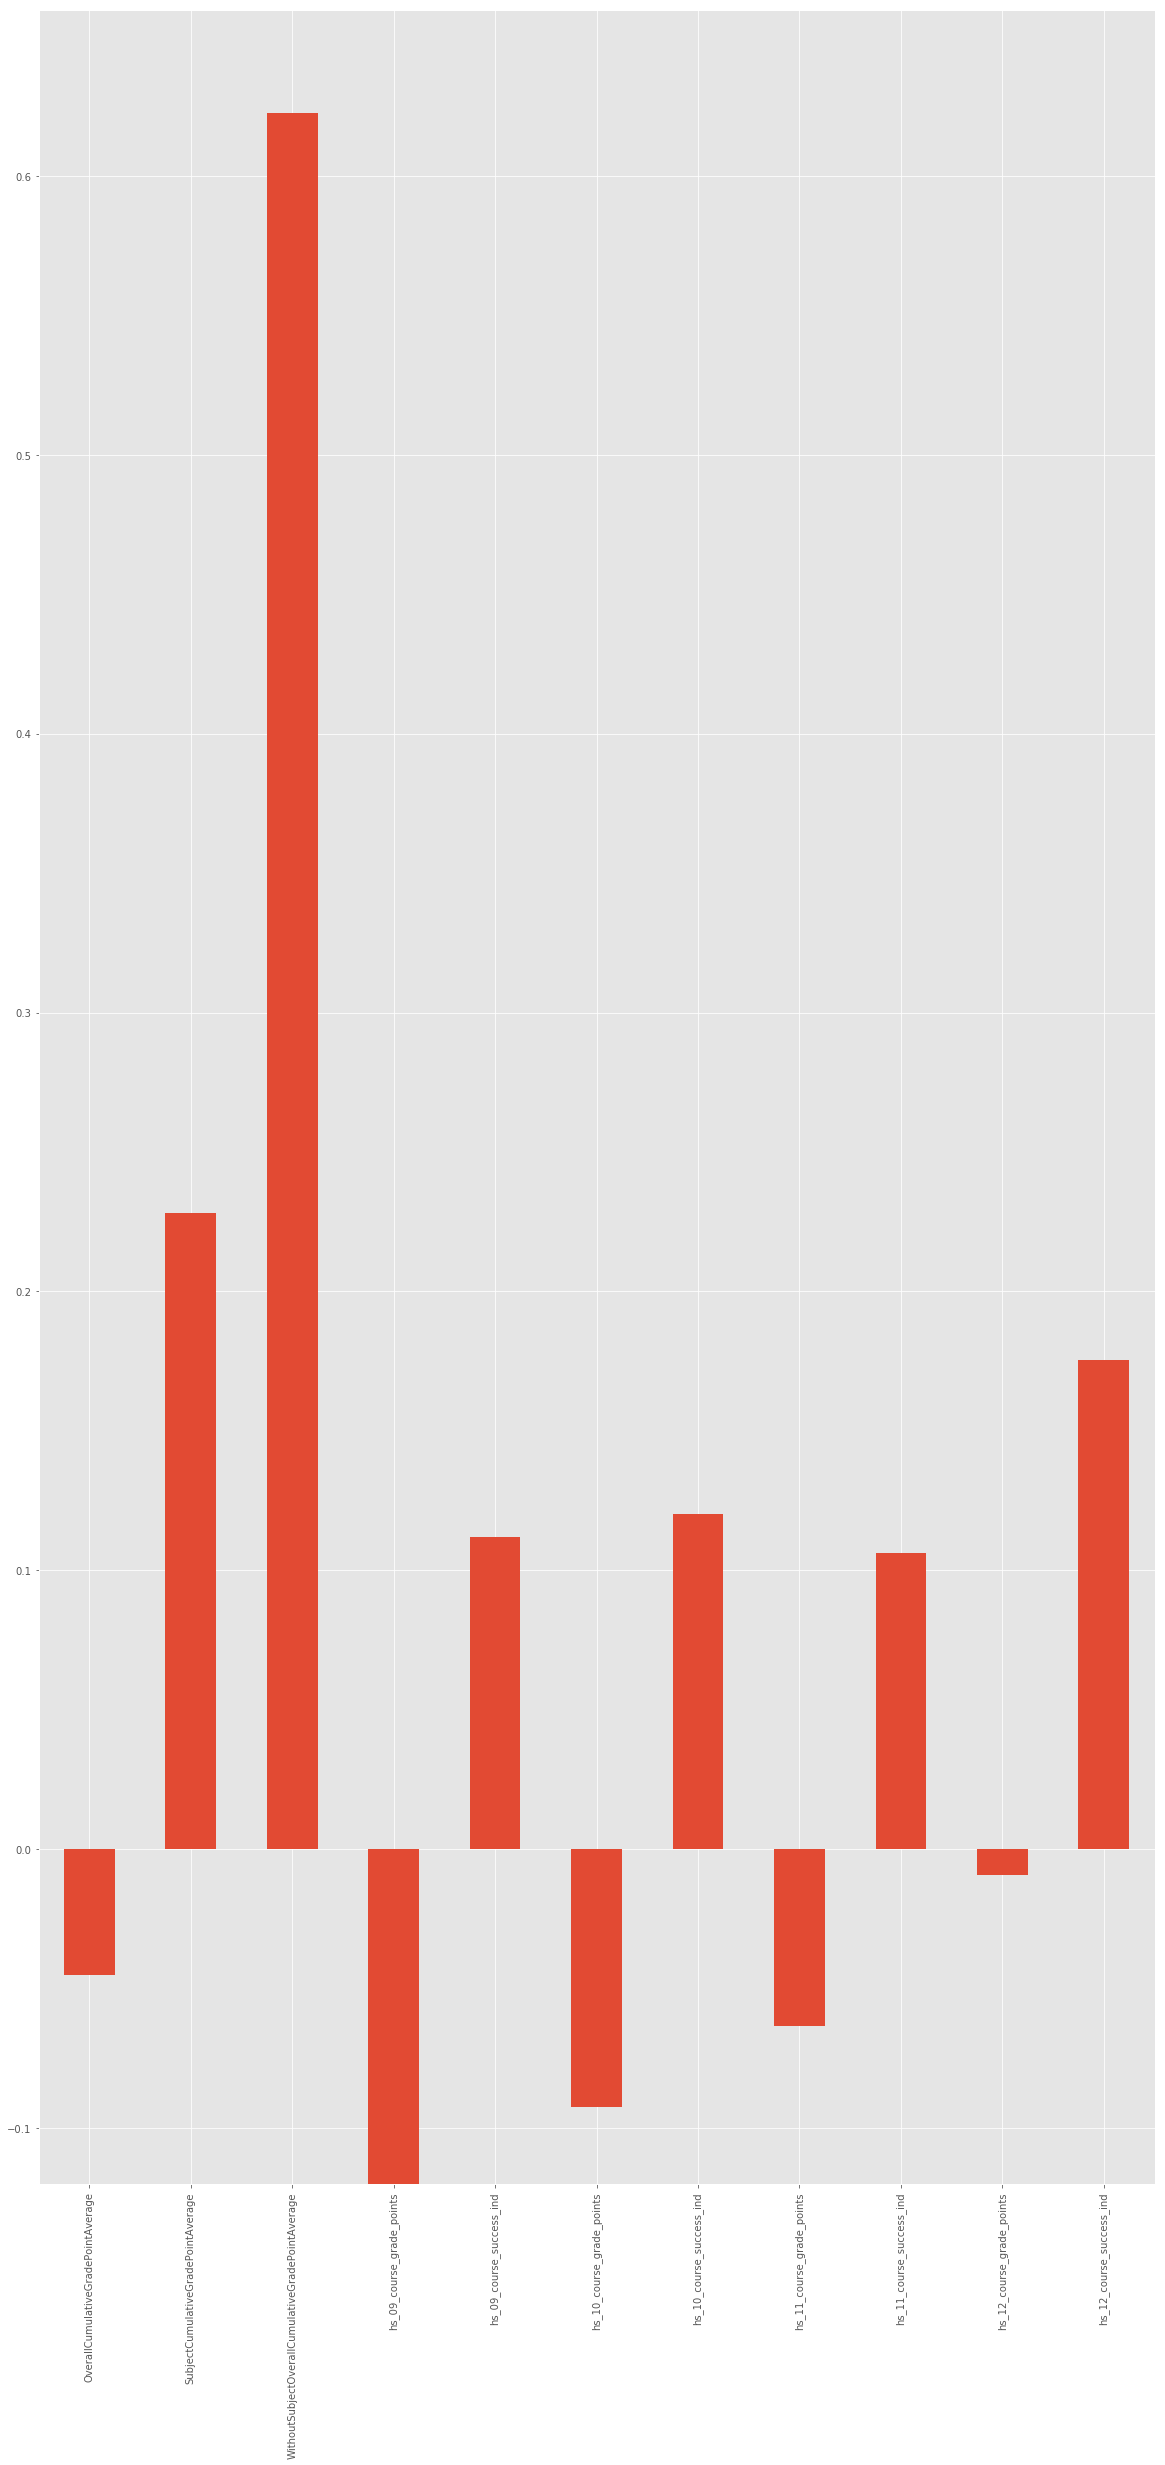

accuracy 0.652
confusion matrix
[[ 557  739]
 [ 305 1399]]


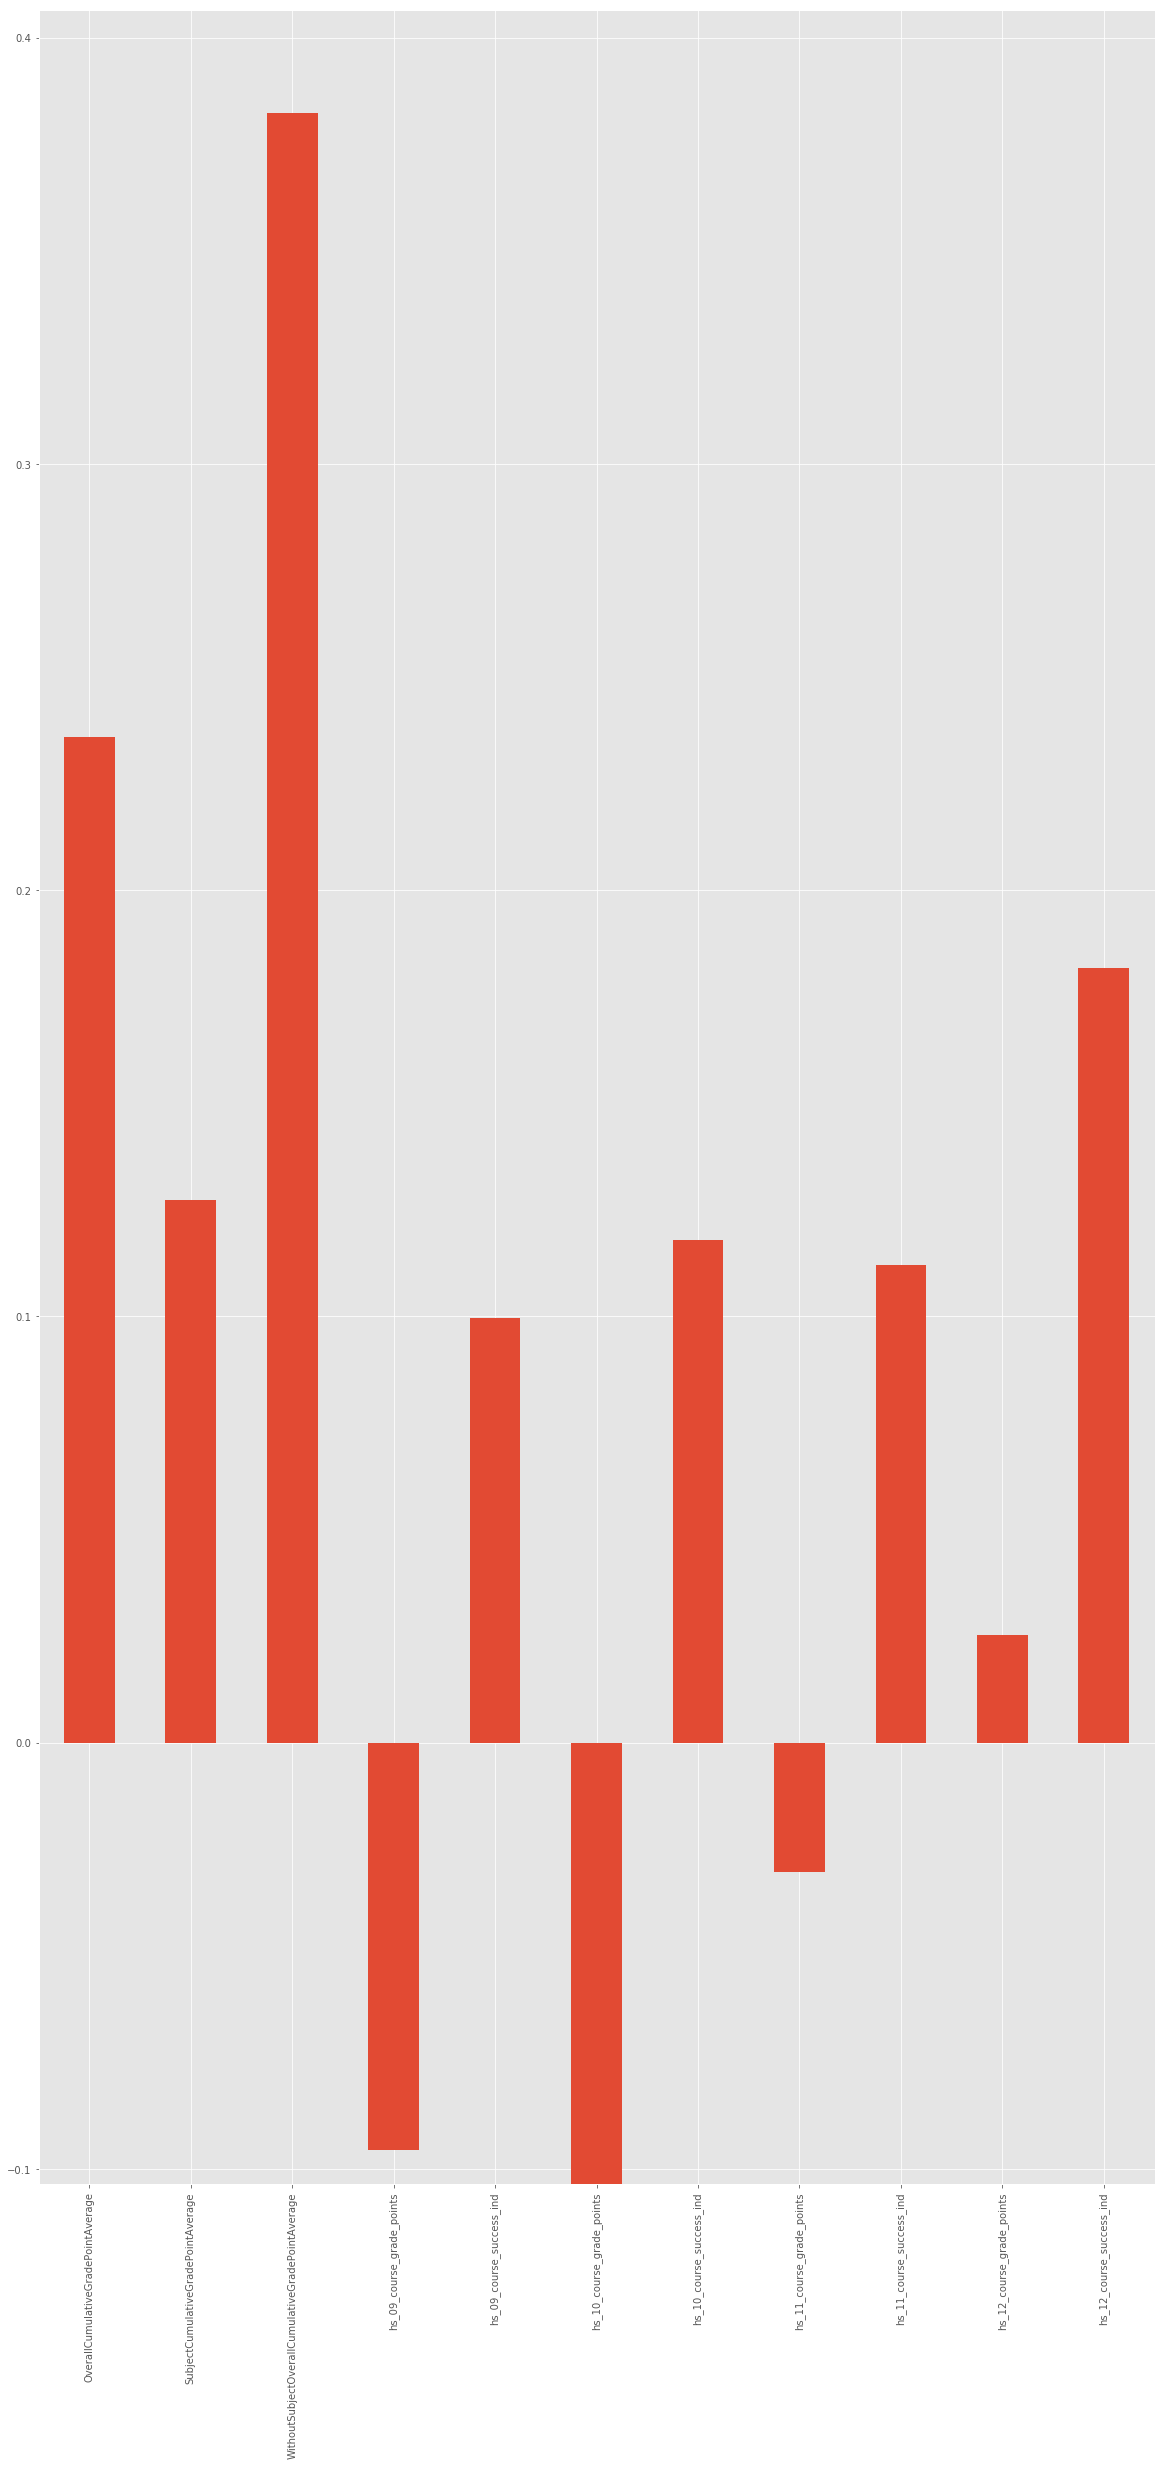

accuracy 0.648
confusion matrix
[[ 551  739]
 [ 317 1393]]


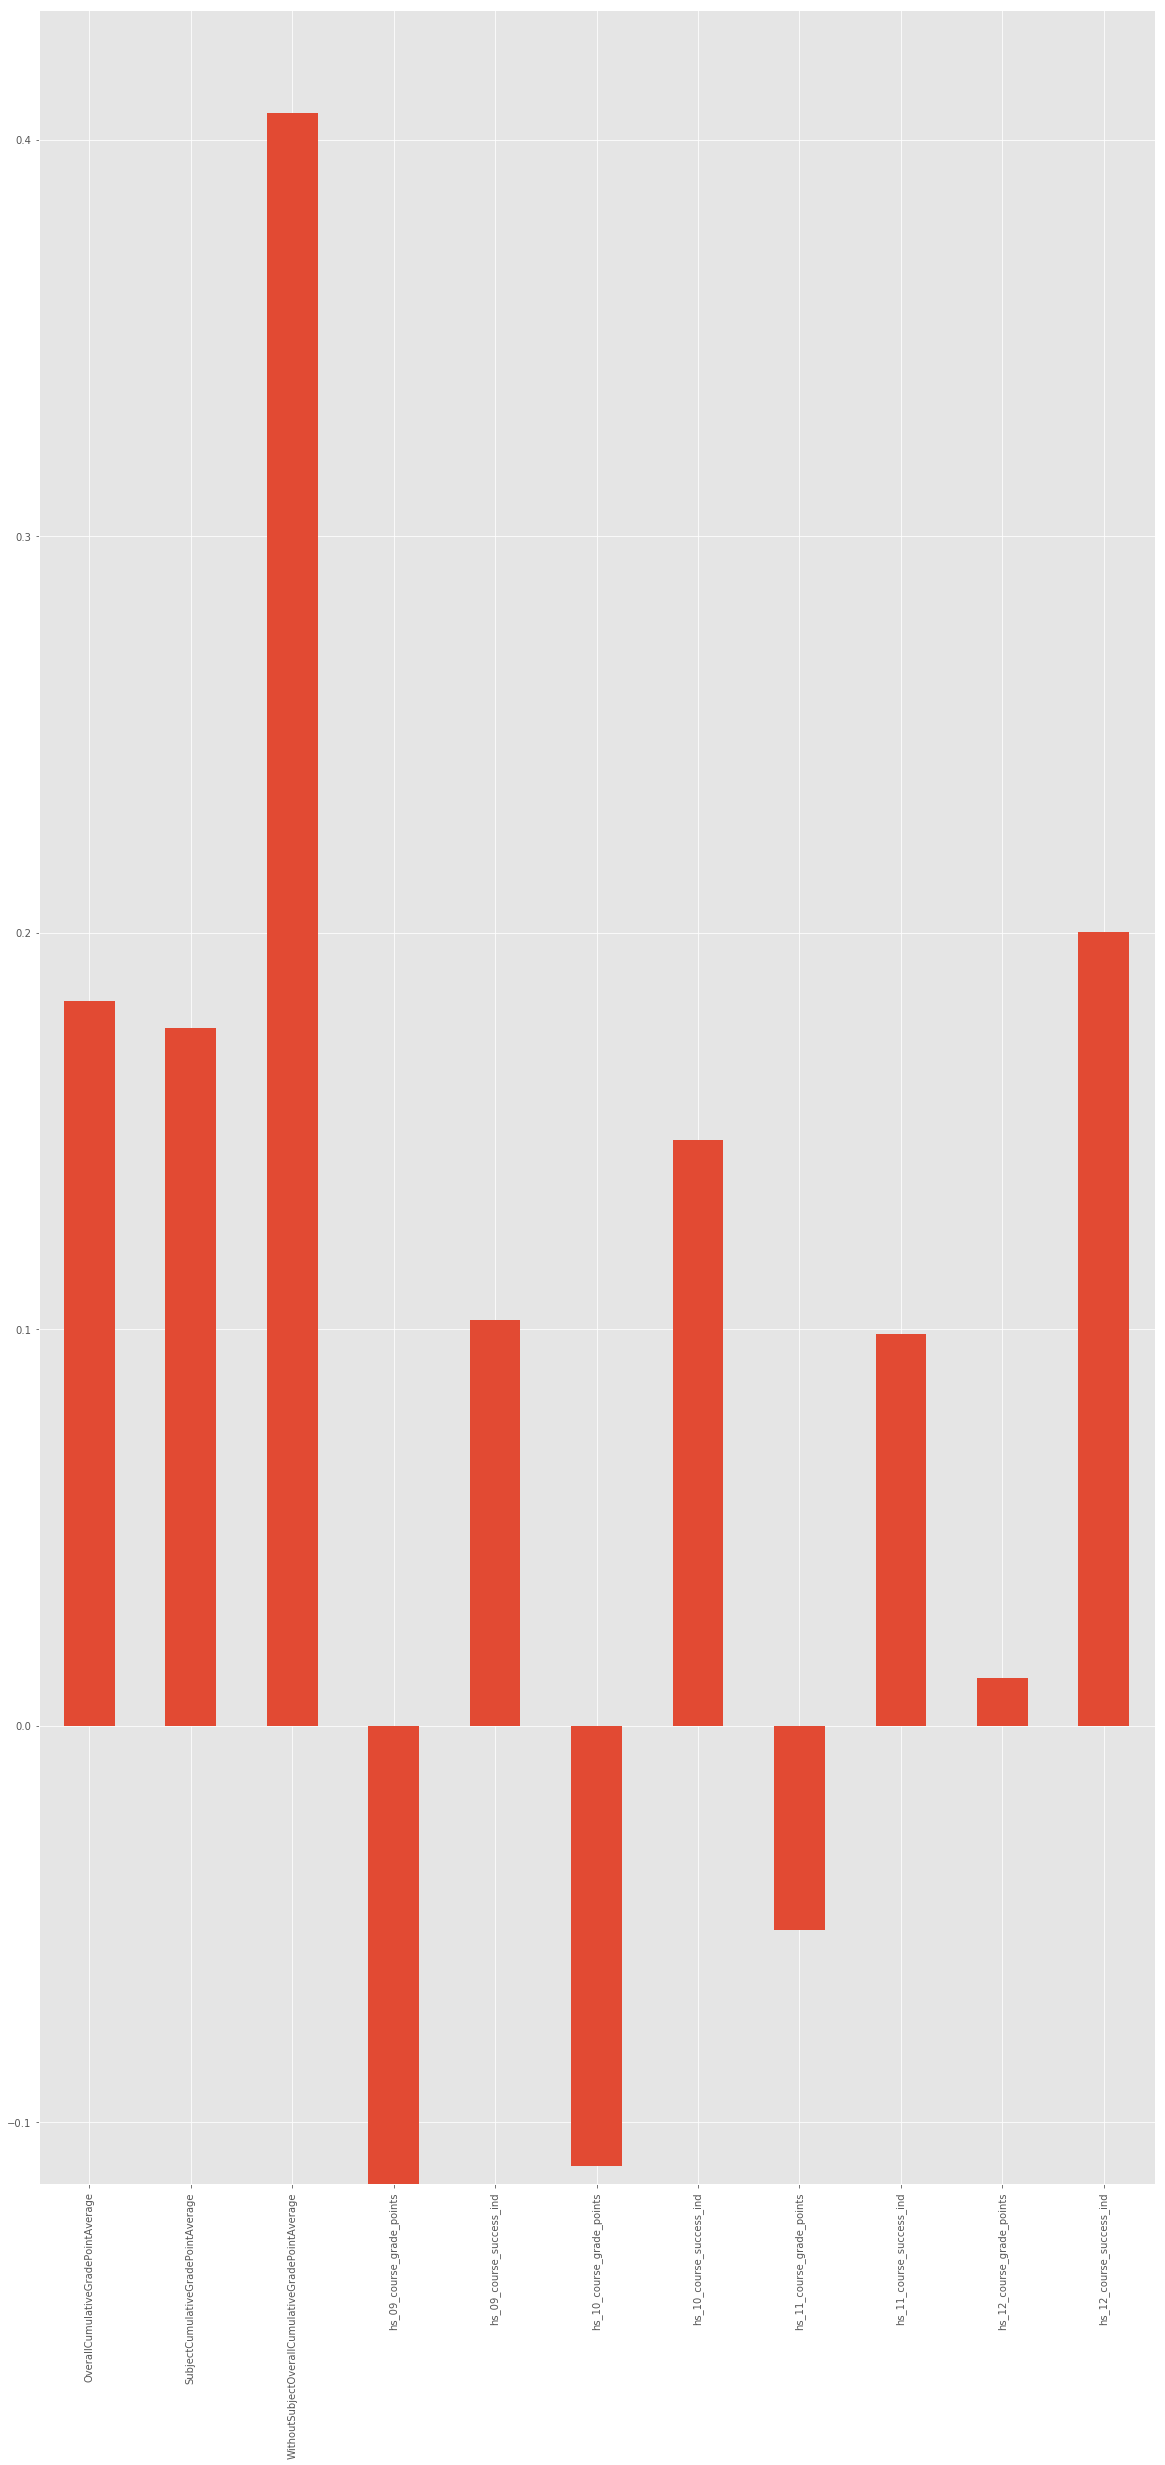

accuracy 0.6453333333333333
confusion matrix
[[ 561  719]
 [ 345 1375]]


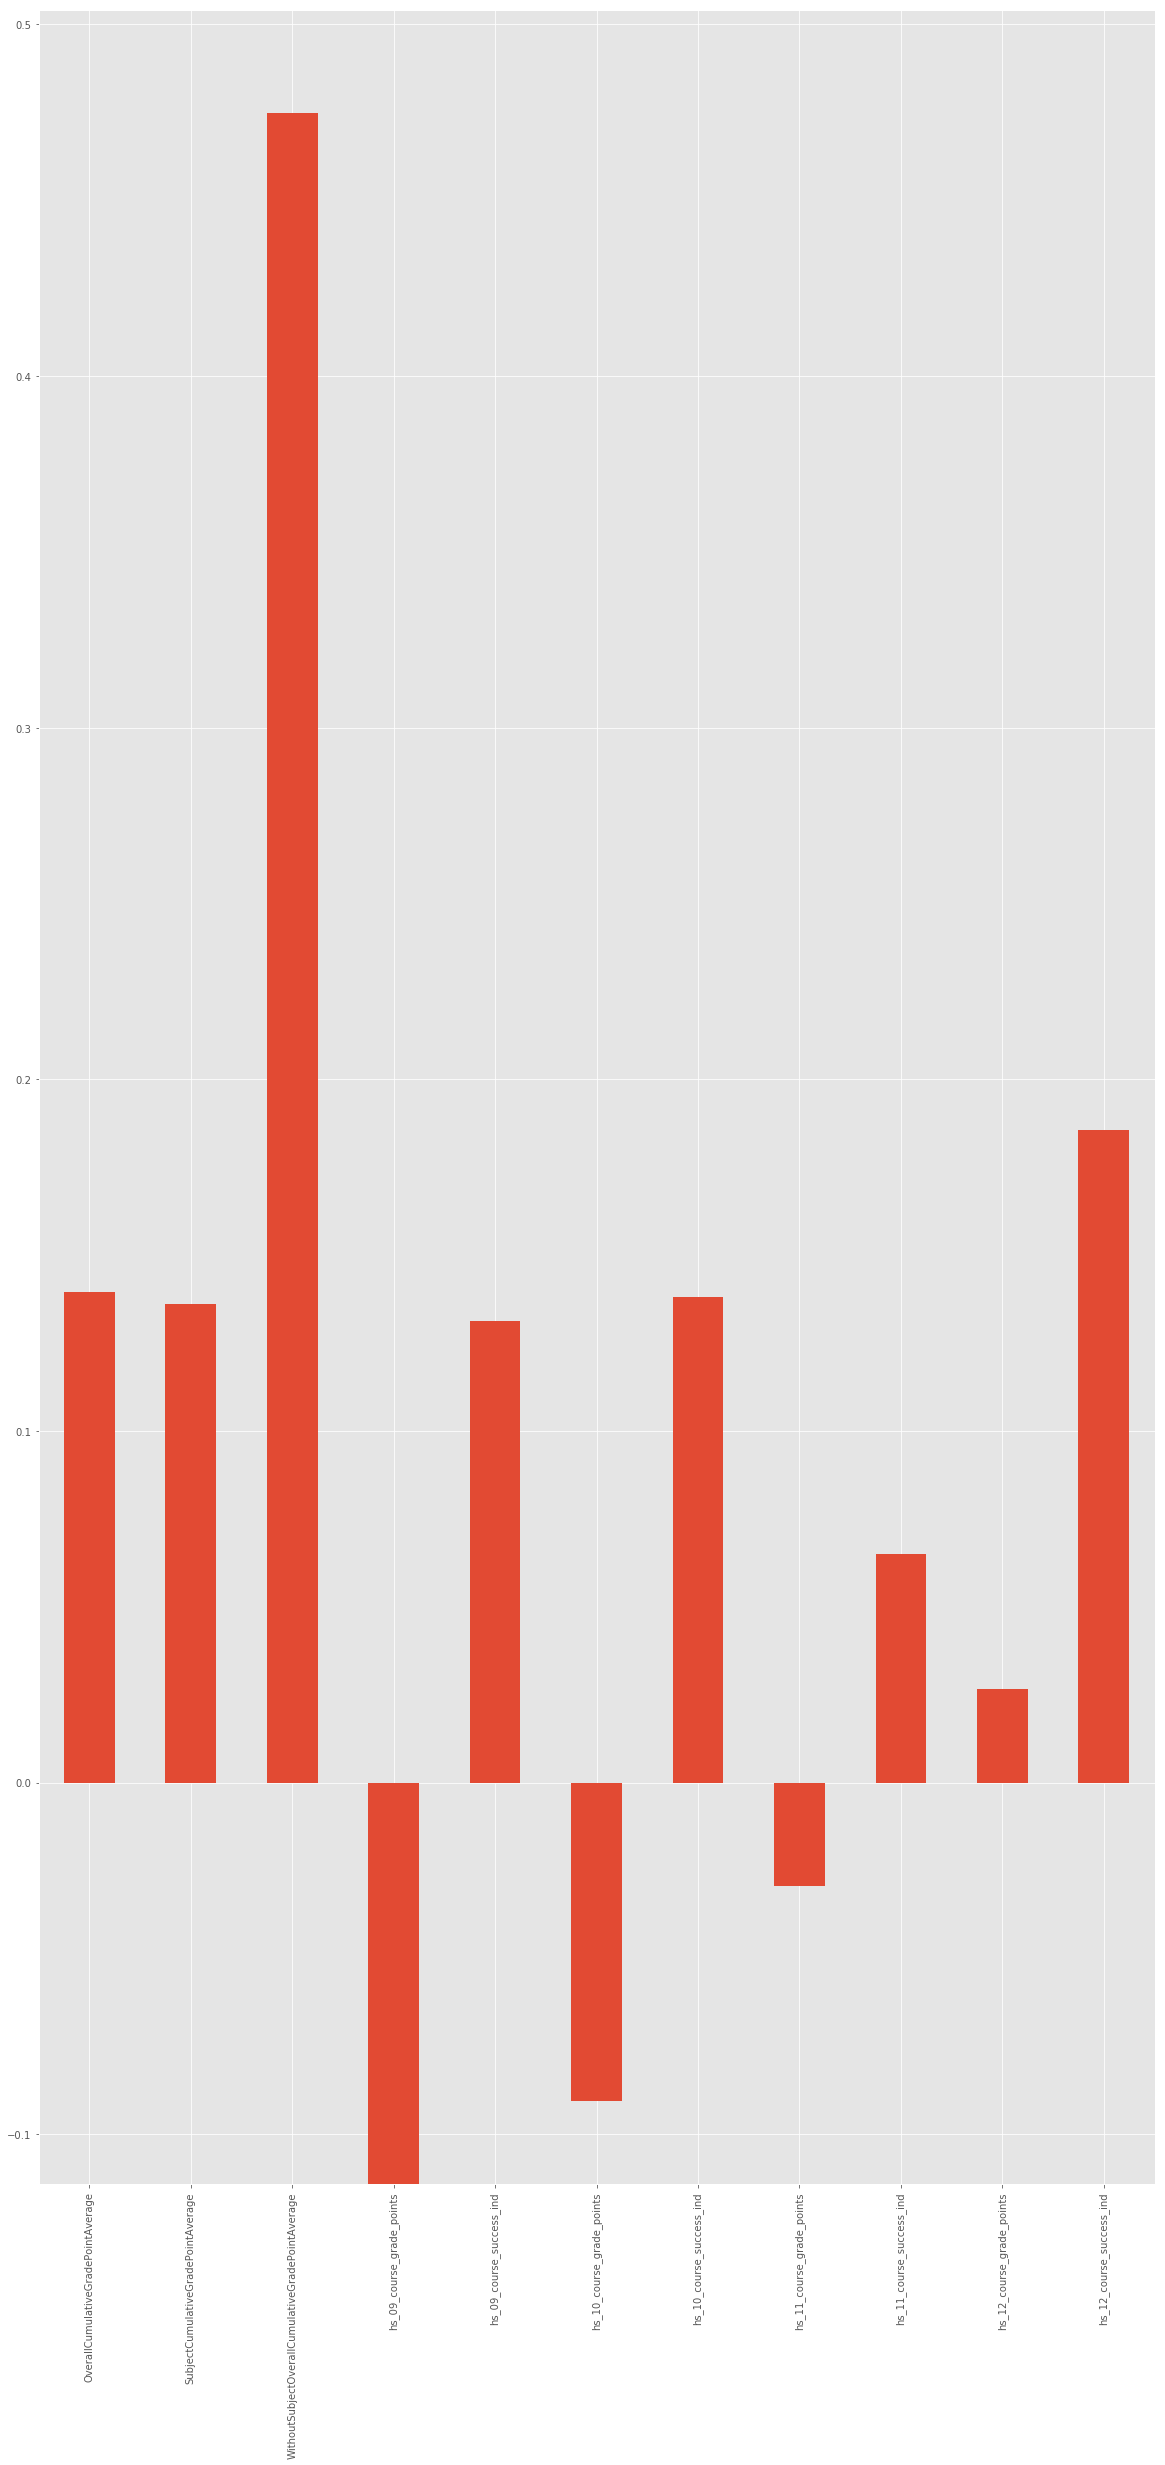

accuracy 0.6376666666666667
confusion matrix
[[ 574  699]
 [ 388 1339]]


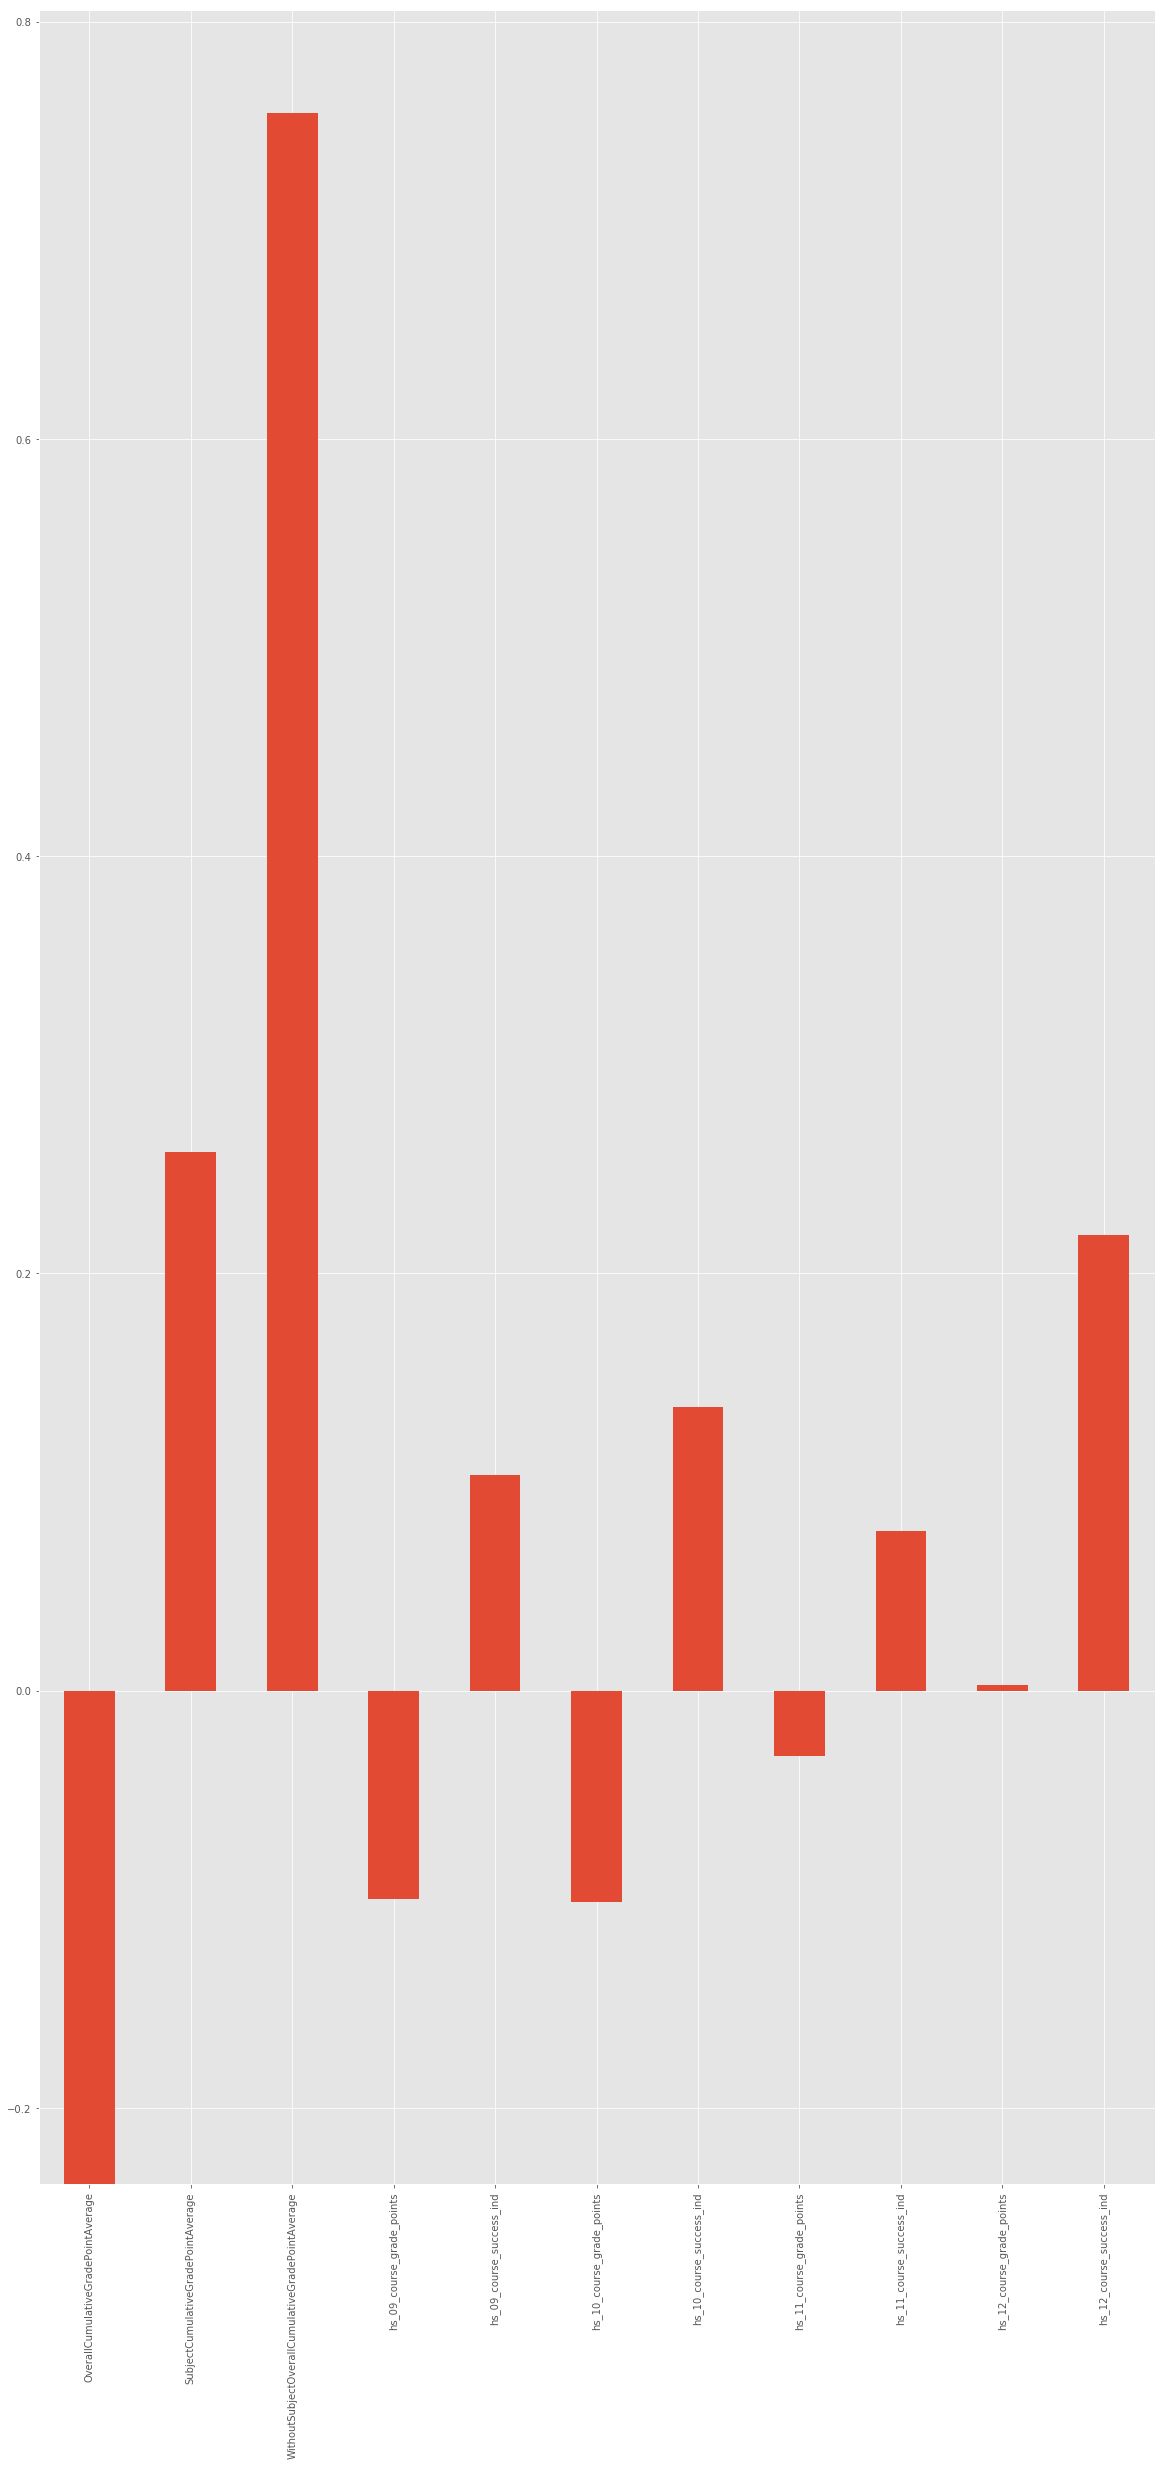

accuracy 0.6576666666666666
confusion matrix
[[ 522  698]
 [ 329 1451]]


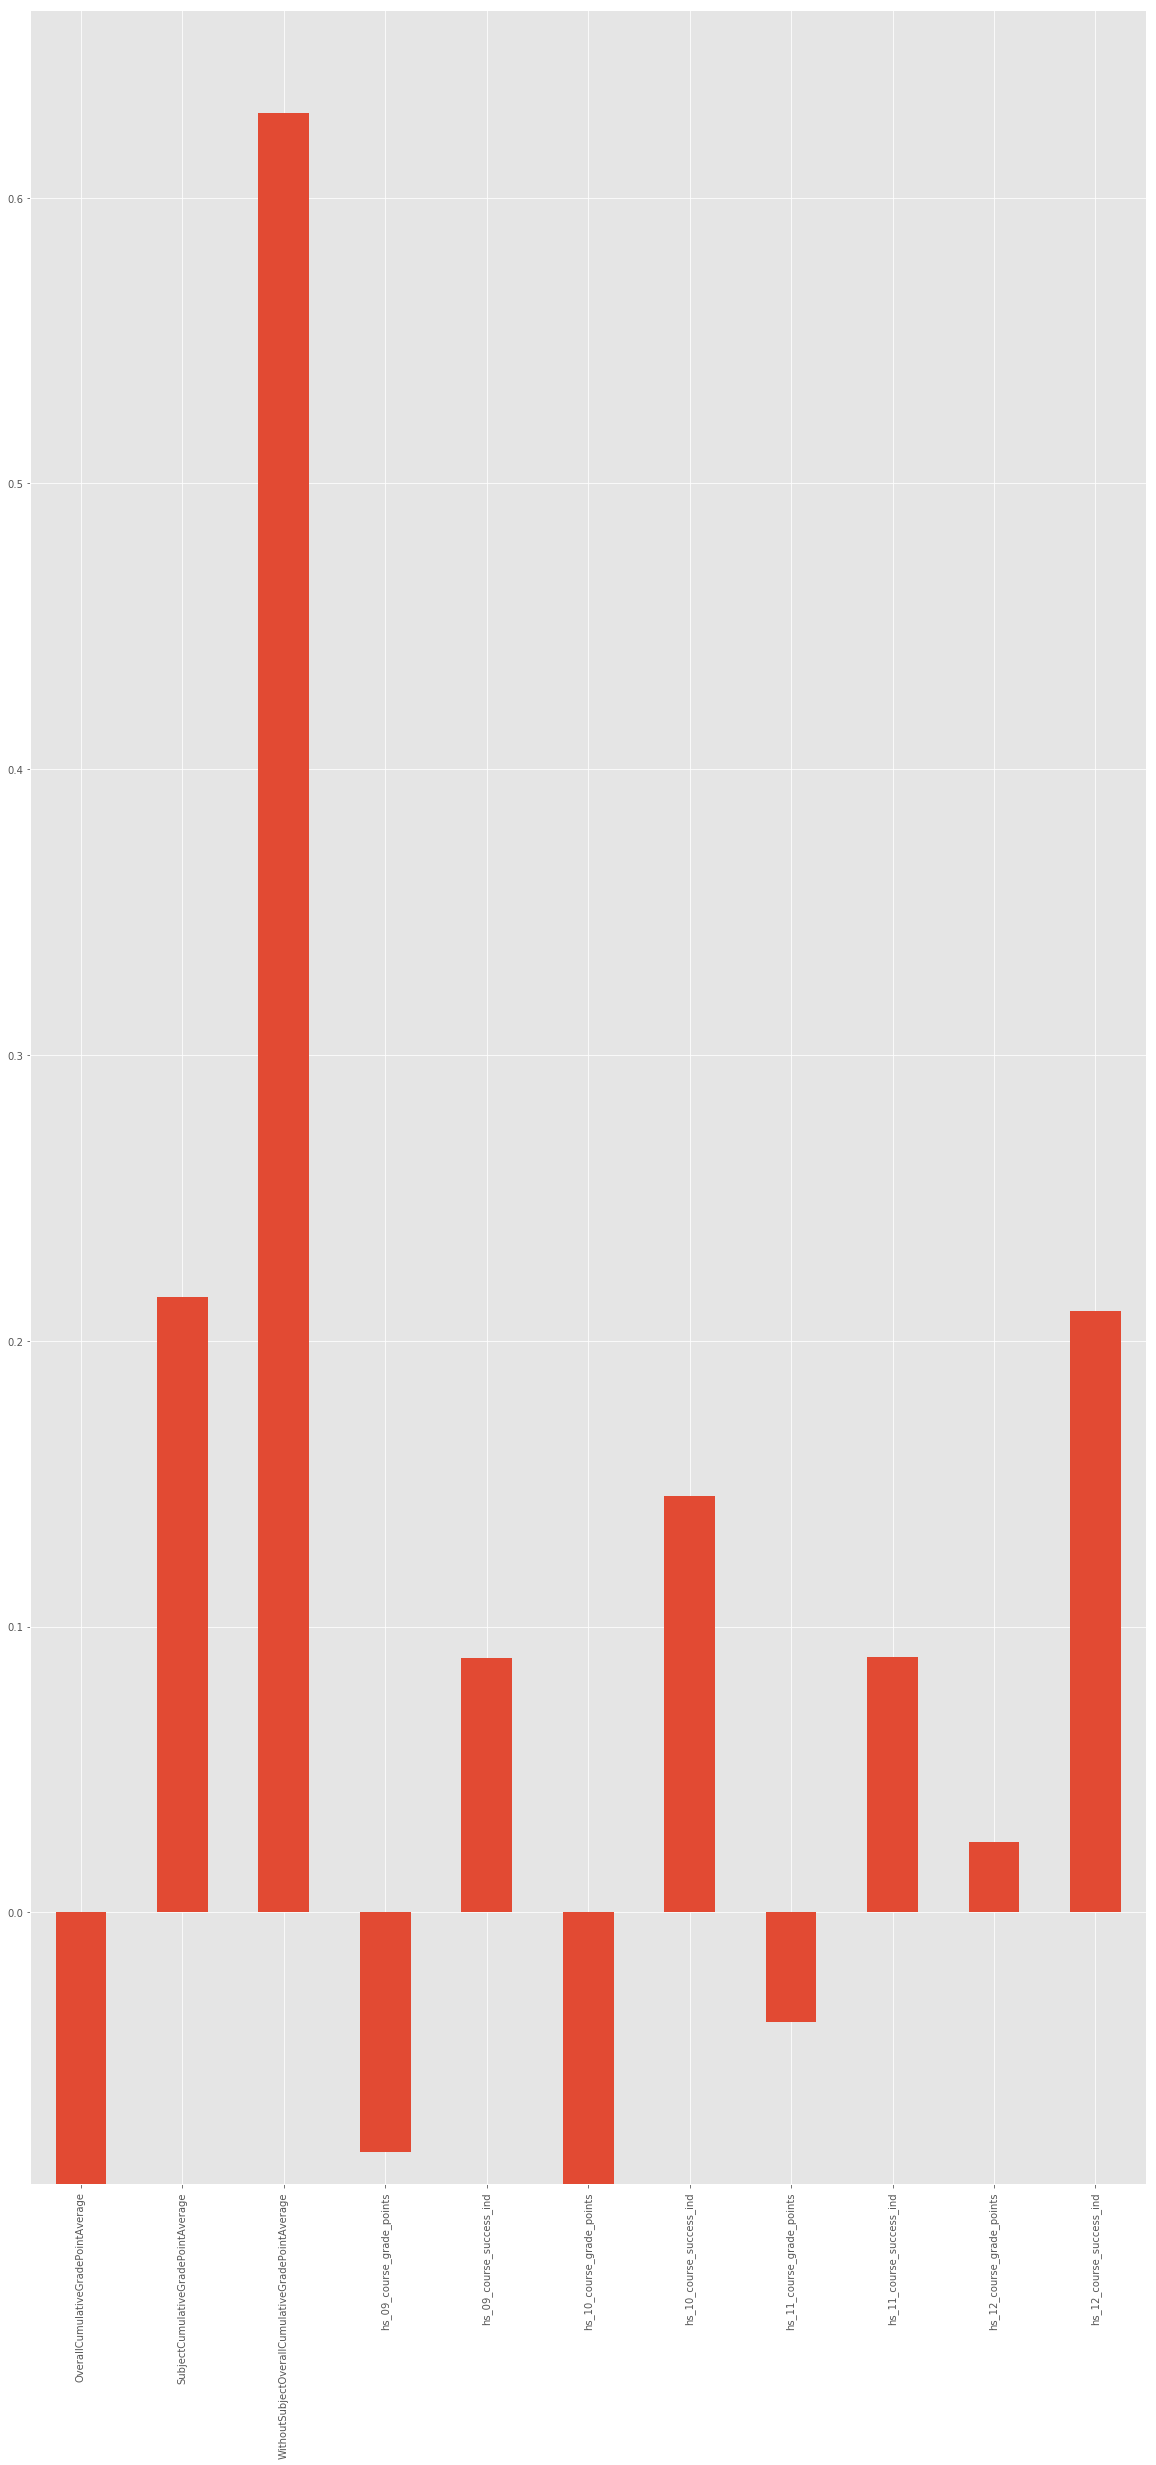

accuracy 0.658
confusion matrix
[[ 567  712]
 [ 314 1407]]


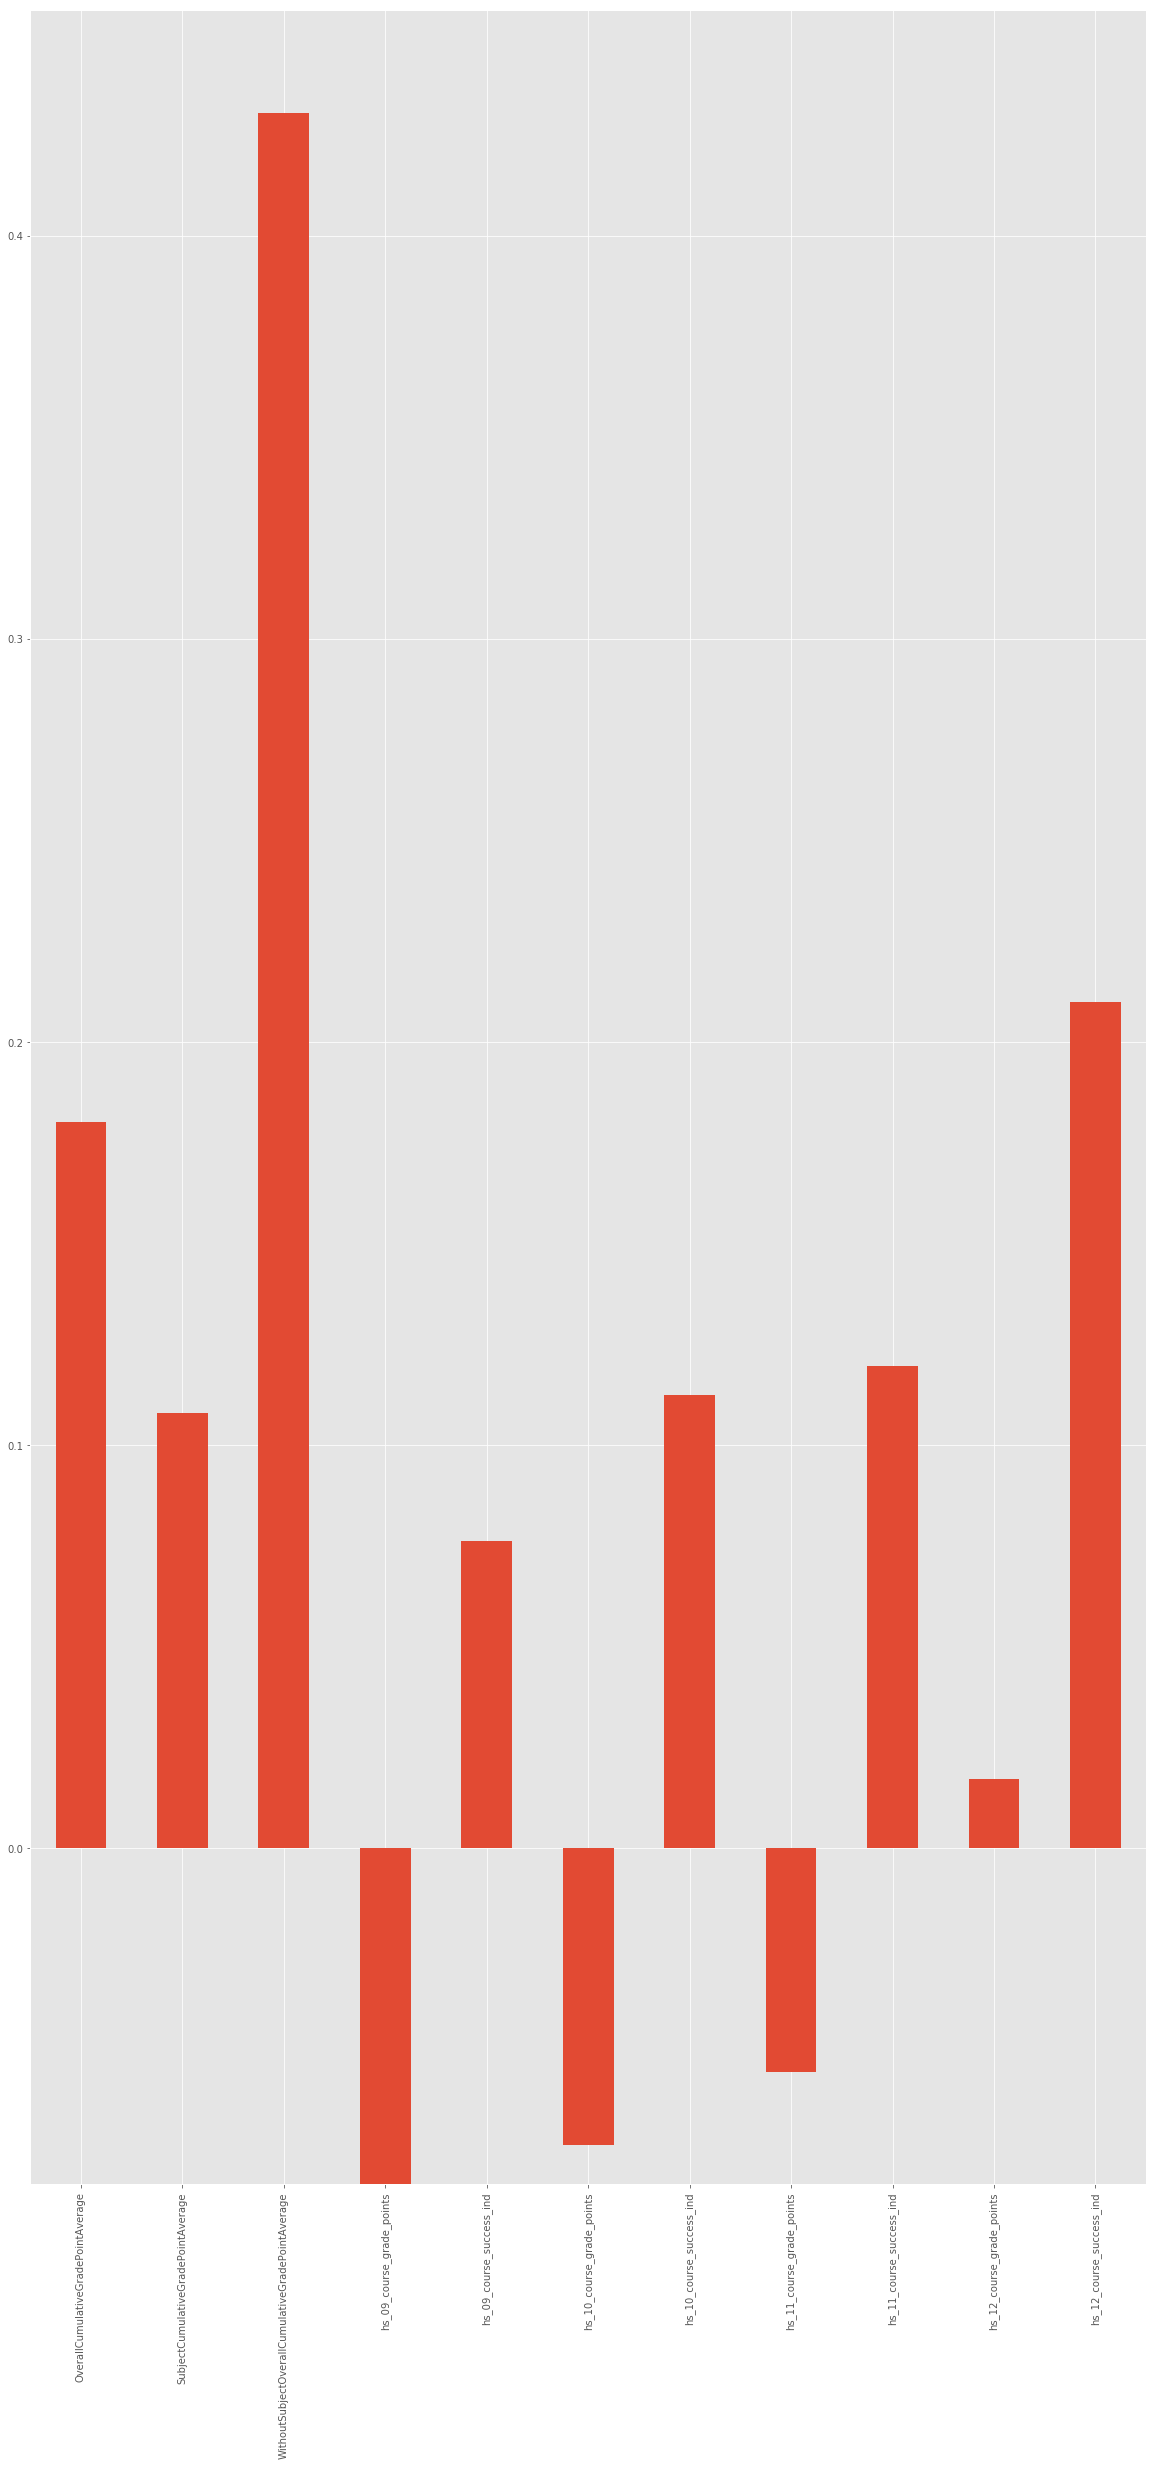

In [32]:
from sklearn.svm import SVC
for train_indices, test_indices in cv_object.split(X,y): 
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    X_train = X_m[train_indices]
    y_train = y_m[train_indices]
    
    X_test = X_m[test_indices]
    y_test = y_m[test_indices]
    scl_obj.fit(X_train)
    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test)
    svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
    svm_clf.fit(X_train_scaled, y_train)  # train object

    y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("accuracy", acc )
    print("confusion matrix")
    print(conf)
   
    weights = pd.Series(svm_clf.coef_[0],index=Z0_stratified_sample.columns)
    weights.plot(kind='bar',figsize=(20,40))
    plt.show()
    train_indicies_linear = train_indices
    support = svm_clf.support_

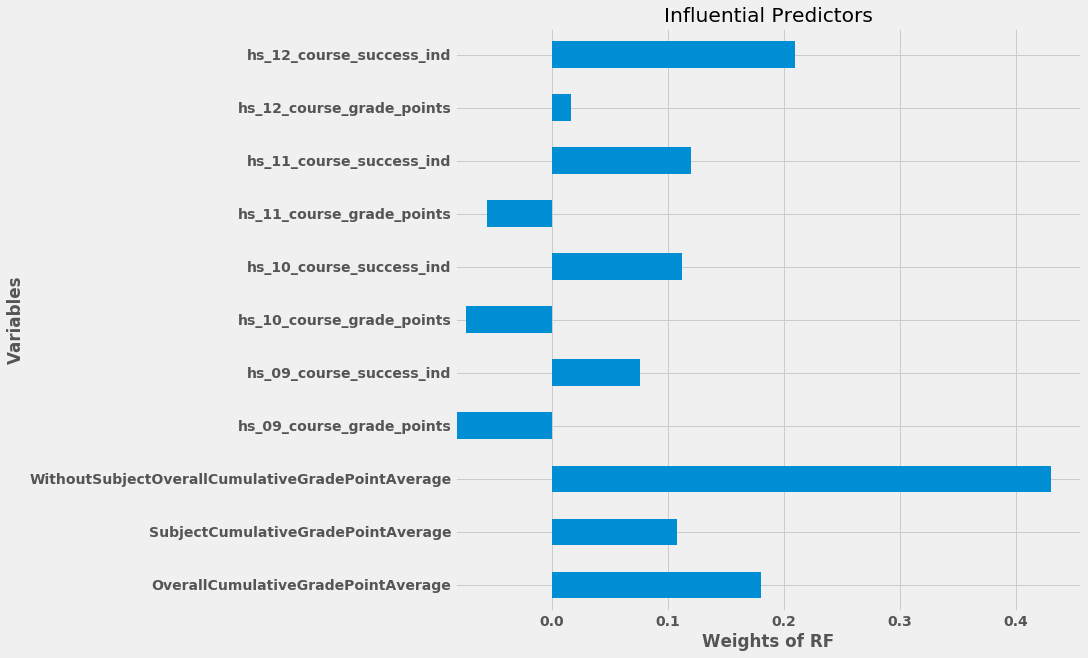

In [33]:
import math
weights2 = weights[abs(weights) > .1
                  ]

# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
weights.plot.barh(figsize=(10,10))
plt.title("Influential Predictors")
plt.xlabel('Weights of RF')
plt.ylabel('Variables')

plt.show()

### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as mt

dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 20, 
                                min_samples_leaf=5, min_samples_split=5,max_leaf_nodes = 62,
                               max_features= None)
accuracy_runs = []
# now get the training and testing
for train_indices, test_indices in cv_object.split(X,y): 
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    # train the decision tree algorithm
    dt_clf.fit(X_train,y_train)
    classe_names = dt_clf.classes_
    print (classe_names)
    digital_label = ['failed', 'passed']
    print (digital_label)
    
    from sklearn import tree
    from sklearn.externals.six import StringIO  
    import pydot 



    dot_data = StringIO() 
    tree.export_graphviz(dt_clf, out_file=dot_data, feature_names= X.columns,  
                    class_names=digital_label )
    
    #print ( dot_data.getvalue() )
    graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

    graph[0].write_pdf("MathDecisionTree.pdf")
    
    
     
    
    
    
    
    yhat = dt_clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    accuracy_runs.append(acc)
    print ('accuracy:', acc)
    precision, recall, fscore, support = score(y_test, yhat)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
print ('average accuracy: ', np.array(accuracy_runs).mean())

[0 1]
['failed', 'passed']
accuracy: 0.6526666666666666
precision: [0.60477454 0.68164794]
recall: [0.53479281 0.74026729]
fscore: [0.56763485 0.7097493 ]
support: [1279 1721]
[0 1]
['failed', 'passed']
accuracy: 0.6526666666666666
precision: [0.60477454 0.68164794]
recall: [0.53479281 0.74026729]
fscore: [0.56763485 0.7097493 ]
support: [1279 1721]
[0 1]
['failed', 'passed']
accuracy: 0.6526666666666666
precision: [0.60477454 0.68164794]
recall: [0.53479281 0.74026729]
fscore: [0.56763485 0.7097493 ]
support: [1279 1721]
[0 1]
['failed', 'passed']
accuracy: 0.6526666666666666
precision: [0.60477454 0.68164794]
recall: [0.53479281 0.74026729]
fscore: [0.56763485 0.7097493 ]
support: [1279 1721]
[0 1]
['failed', 'passed']
accuracy: 0.6526666666666666
precision: [0.60477454 0.68164794]
recall: [0.53479281 0.74026729]
fscore: [0.56763485 0.7097493 ]
support: [1279 1721]
[0 1]
['failed', 'passed']
accuracy: 0.6526666666666666
precision: [0.60477454 0.68164794]
recall: [0.53479281 0.7402672

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as mt

dt_clf = DecisionTreeClassifier(criterion='gini', max_depth = 20, 
                                min_samples_leaf=5, min_samples_split=5,max_leaf_nodes = 62,
                               max_features= None)
accuracy_runs = []
# now get the training and testing
for train_indices, test_indices in cv_object.split(X,y): 
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    # train the decision tree algorithm
    dt_clf.fit(X_train,y_train)
    yhat = dt_clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    accuracy_runs.append(acc)
    print ('accuracy:', acc)
    precision, recall, fscore, support = score(y_test, yhat)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
print ('average accuracy: ', np.array(accuracy_runs).mean())

accuracy: 0.6483333333333333
precision: [0.60447761 0.67271784]
recall: [0.50664582 0.75363161]
fscore: [0.55125479 0.71087969]
support: [1279 1721]
accuracy: 0.6483333333333333
precision: [0.60447761 0.67271784]
recall: [0.50664582 0.75363161]
fscore: [0.55125479 0.71087969]
support: [1279 1721]
accuracy: 0.6483333333333333
precision: [0.60447761 0.67271784]
recall: [0.50664582 0.75363161]
fscore: [0.55125479 0.71087969]
support: [1279 1721]
accuracy: 0.6483333333333333
precision: [0.60447761 0.67271784]
recall: [0.50664582 0.75363161]
fscore: [0.55125479 0.71087969]
support: [1279 1721]
accuracy: 0.6483333333333333
precision: [0.60447761 0.67271784]
recall: [0.50664582 0.75363161]
fscore: [0.55125479 0.71087969]
support: [1279 1721]
accuracy: 0.6483333333333333
precision: [0.60447761 0.67271784]
recall: [0.50664582 0.75363161]
fscore: [0.55125479 0.71087969]
support: [1279 1721]
accuracy: 0.6483333333333333
precision: [0.60447761 0.67271784]
recall: [0.50664582 0.75363161]
fscore: [0

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as mt

dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 20, 
                                min_samples_leaf=5, min_samples_split=5,max_leaf_nodes = 62,
                               max_features= None)
accuracy_runs = []
# now get the training and testing
for train_indices, test_indices in cv_object.split(X,y): 
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    # train the decision tree algorithm
    dt_clf.fit(X_train,y_train)
    yhat = dt_clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    accuracy_runs.append(acc)
    print ('accuracy:', acc)
    precision, recall, fscore, support = score(y_test, yhat)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
print ('average accuracy: ', np.array(accuracy_runs).mean())

accuracy: 0.6526666666666666
precision: [0.60477454 0.68164794]
recall: [0.53479281 0.74026729]
fscore: [0.56763485 0.7097493 ]
support: [1279 1721]
accuracy: 0.6526666666666666
precision: [0.60477454 0.68164794]
recall: [0.53479281 0.74026729]
fscore: [0.56763485 0.7097493 ]
support: [1279 1721]
accuracy: 0.6526666666666666
precision: [0.60477454 0.68164794]
recall: [0.53479281 0.74026729]
fscore: [0.56763485 0.7097493 ]
support: [1279 1721]
accuracy: 0.6526666666666666
precision: [0.60477454 0.68164794]
recall: [0.53479281 0.74026729]
fscore: [0.56763485 0.7097493 ]
support: [1279 1721]
accuracy: 0.6526666666666666
precision: [0.60477454 0.68164794]
recall: [0.53479281 0.74026729]
fscore: [0.56763485 0.7097493 ]
support: [1279 1721]
accuracy: 0.6526666666666666
precision: [0.60477454 0.68164794]
recall: [0.53479281 0.74026729]
fscore: [0.56763485 0.7097493 ]
support: [1279 1721]
accuracy: 0.6526666666666666
precision: [0.60477454 0.68164794]
recall: [0.53479281 0.74026729]
fscore: [0

hs_09_course_success_ind has importance of 0.0
hs_10_course_success_ind has importance of 0.0
hs_12_course_success_ind has importance of 0.0
hs_10_course_grade_points has importance of 0.007545170262819281
hs_11_course_success_ind has importance of 0.007744896484663261
hs_09_course_grade_points has importance of 0.02515636034713134
hs_11_course_grade_points has importance of 0.026276240467340554
hs_12_course_grade_points has importance of 0.028375567075574867
SubjectCumulativeGradePointAverage has importance of 0.041013753405516676
WithoutSubjectOverallCumulativeGradePointAverage has importance of 0.05465151961424816
OverallCumulativeGradePointAverage has importance of 0.8092364923427059


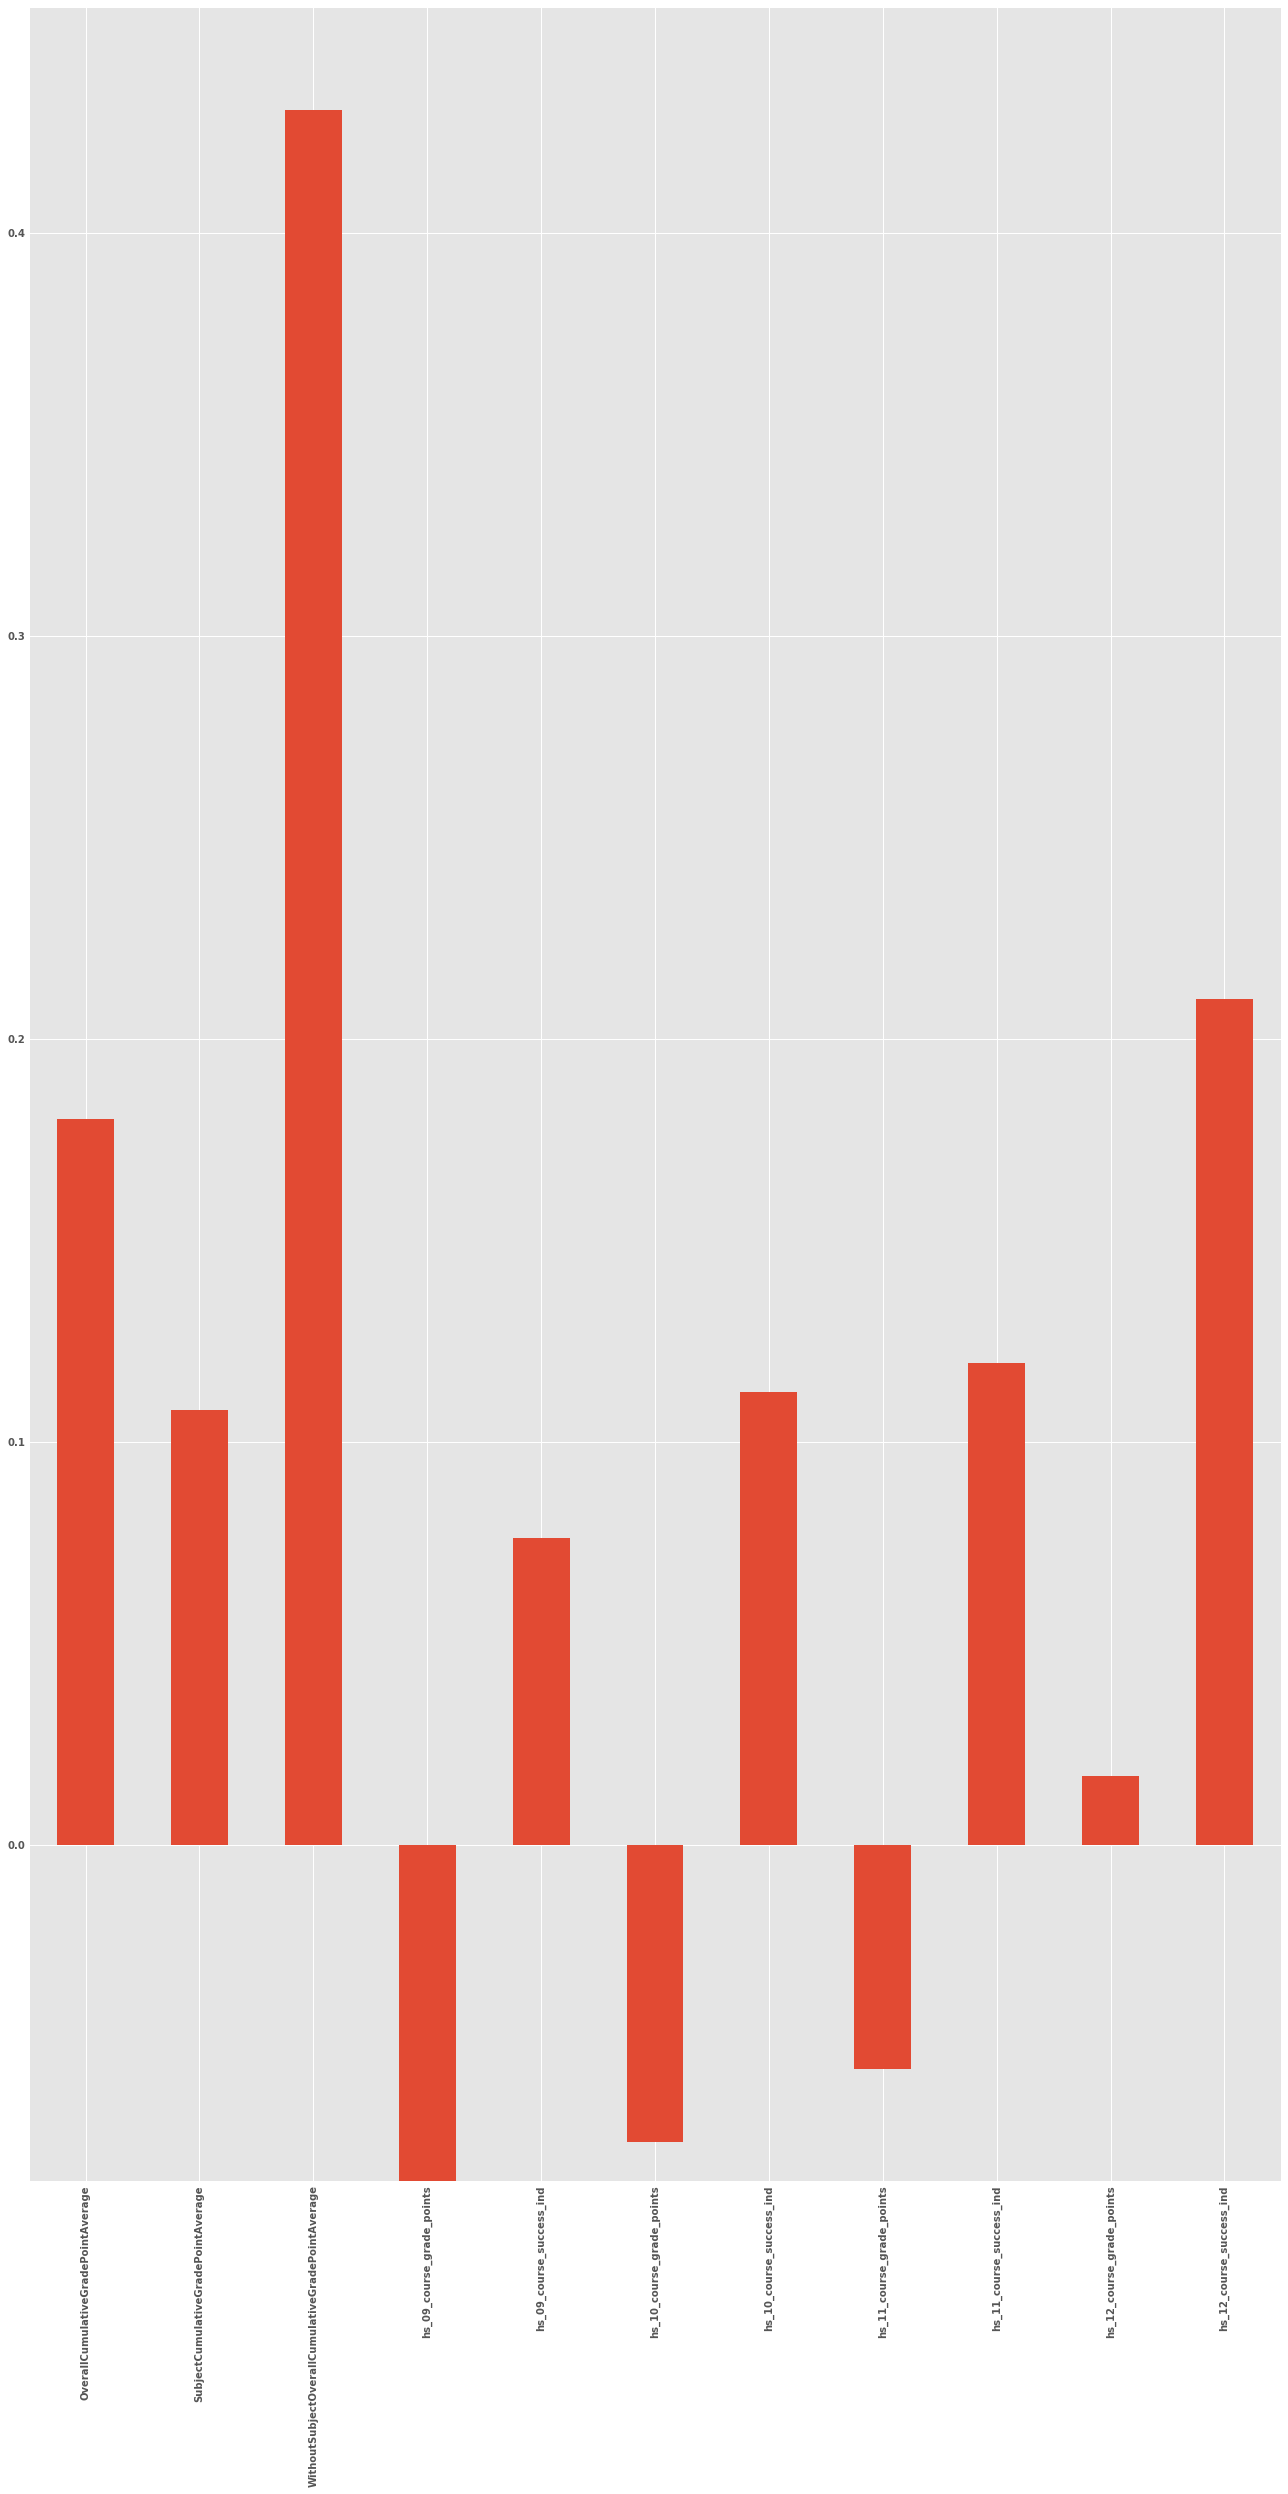

In [37]:
imp = dt_clf.feature_importances_
from matplotlib import pyplot as plt
%matplotlib inline
zip_vars = zip(imp,X.columns) # combine attributes
zip_vars=sorted(zip_vars) # sort them by the magnitude of the weight
for coef, name in zip_vars:
    print(name, 'has importance of', coef)
    
plt.style.use('ggplot')

weights.plot(kind='bar',figsize=(20,40))
plt.show()

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

accuracy_runs = []

rf_clf = RandomForestClassifier()
for train_indices, test_indices in cv_object.split(X,y): 
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    rf_clf.fit(X_train,y_train)
    yhat = rf_clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    accuracy_runs.append(acc)
    print ('accuracy:', acc)
print ('average accuracy: ', np.array(accuracy_runs).mean())

accuracy: 0.589
accuracy: 0.6106666666666667
accuracy: 0.6
accuracy: 0.608
accuracy: 0.5996666666666667
accuracy: 0.609
accuracy: 0.6143333333333333
accuracy: 0.5963333333333334
accuracy: 0.6053333333333333
accuracy: 0.5943333333333334
average accuracy:  0.6026666666666667


In [39]:
from sklearn.ensemble import RandomForestClassifier

accuracy_runs = []

rf_clf = RandomForestClassifier(max_depth=50, n_estimators=1000, n_jobs=-1,class_weight="balanced",oob_score=True)
for train_indices, test_indices in cv_object.split(X,y): 
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    rf_clf.fit(X_train,y_train)
    yhat = rf_clf.predict(X_test)
    
    y_test_probabilities = rf_clf.predict_proba(X_test)
   # y_test_probabilities has shape = [n_samples, n_classes]

    y_test_predictions_high_precision = y_test_probabilities[:,1] > 0.7
    y_test_predictions_high_recall = y_test_probabilities[:,1] > 0.3
    
    acc = mt.accuracy_score(y_test,y_test_predictions_high_recall)
    accuracy_runs.append(acc)
    conf = mt.confusion_matrix(y_test,y_test_predictions_high_recall)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    
    precision, recall, fscore, support = score(y_test, y_test_predictions_high_recall)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
print ('average accuracy: ', np.array(accuracy_runs).mean())

====Iteration 10  ====
accuracy 0.6
confusion matrix
 [[ 166 1113]
 [  87 1634]]
precision: [0.65612648 0.59483072]
recall: [0.1297889 0.949448 ]
fscore: [0.21671018 0.73142346]
support: [1279 1721]
====Iteration 10  ====
accuracy 0.5983333333333334
confusion matrix
 [[ 159 1120]
 [  85 1636]]
precision: [0.65163934 0.59361393]
recall: [0.12431587 0.95061011]
fscore: [0.20879842 0.73084655]
support: [1279 1721]
====Iteration 10  ====
accuracy 0.596
confusion matrix
 [[ 158 1121]
 [  91 1630]]
precision: [0.63453815 0.59251181]
recall: [0.12353401 0.94712377]
fscore: [0.20680628 0.72898032]
support: [1279 1721]
====Iteration 10  ====
accuracy 0.5943333333333334
confusion matrix
 [[ 149 1130]
 [  87 1634]]
precision: [0.63135593 0.59117221]
recall: [0.11649726 0.949448  ]
fscore: [0.19669967 0.72865106]
support: [1279 1721]
====Iteration 10  ====
accuracy 0.594
confusion matrix
 [[ 152 1127]
 [  91 1630]]
precision: [0.6255144  0.59122234]
recall: [0.11884285 0.94712377]
fscore: [0.19973

In [40]:
from sklearn.ensemble import RandomForestClassifier

accuracy_runs = []

rf_clf = RandomForestClassifier(criterion='gini', max_depth = 10,min_samples_leaf=5,
                                min_samples_split=5,max_leaf_nodes = 62,
                                max_features= None)
for train_indices, test_indices in cv_object.split(X,y):  
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    rf_clf.fit(X_train,y_train)
    yhat = rf_clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    accuracy_runs.append(acc)
    print ('accuracy:', acc)
    precision, recall, fscore, support = score(y_test, yhat)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
print ('average accuracy: ', np.array(accuracy_runs).mean())

accuracy: 0.6553333333333333
precision: [0.61290323 0.67937337]
recall: [0.51993745 0.75595584]
fscore: [0.56260575 0.71562156]
support: [1279 1721]
accuracy: 0.657
precision: [0.61927481 0.6772541 ]
recall: [0.50742768 0.76815805]
fscore: [0.55779974 0.71984754]
support: [1279 1721]
accuracy: 0.6486666666666666
precision: [0.6007162  0.67711099]
recall: [0.52462862 0.74084834]
fscore: [0.56010017 0.70754717]
support: [1279 1721]
accuracy: 0.65
precision: [0.60533579 0.67537899]
recall: [0.51446443 0.75072632]
fscore: [0.55621302 0.71106219]
support: [1279 1721]
accuracy: 0.6433333333333333
precision: [0.59372197 0.67267905]
recall: [0.51759187 0.73678094]
fscore: [0.55304929 0.70327232]
support: [1279 1721]
accuracy: 0.651
precision: [0.60564663 0.67718191]
recall: [0.51993745 0.74840209]
fscore: [0.55952882 0.71101297]
support: [1279 1721]
accuracy: 0.6546666666666666
precision: [0.61302326 0.67792208]
recall: [0.51524629 0.75828007]
fscore: [0.55989805 0.71585299]
support: [1279 172

In [41]:
from sklearn.ensemble import RandomForestClassifier

accuracy_runs = []

rf_clf = RandomForestClassifier(n_estimators = 100,criterion='gini', max_depth = 10,min_samples_leaf=5,
                                min_samples_split=5,max_leaf_nodes = 62,
                                max_features= None)
for train_indices, test_indices in cv_object.split(X,y):  
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    rf_clf.fit(X_train,y_train)
    yhat = rf_clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    accuracy_runs.append(acc)
    print ('accuracy:', acc)
    precision, recall, fscore, support = score(y_test, yhat)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
print ('average accuracy: ', np.array(accuracy_runs).mean())

accuracy: 0.654
precision: [0.61065197 0.67870225]
recall: [0.51993745 0.75363161]
fscore: [0.56165541 0.71420705]
support: [1279 1721]
accuracy: 0.655
precision: [0.60971223 0.68167373]
recall: [0.53010164 0.74782103]
fscore: [0.56712673 0.71321696]
support: [1279 1721]
accuracy: 0.653
precision: [0.60625    0.68085106]
recall: [0.5308835  0.74375363]
fscore: [0.5660692  0.71091364]
support: [1279 1721]
accuracy: 0.652
precision: [0.60557053 0.67938527]
recall: [0.5269742  0.74491575]
fscore: [0.56354515 0.71064302]
support: [1279 1721]
accuracy: 0.655
precision: [0.6133829  0.67827443]
recall: [0.51602815 0.75828007]
fscore: [0.56050955 0.71604938]
support: [1279 1721]
accuracy: 0.6506666666666666
precision: [0.60340197 0.6787042 ]
recall: [0.5269742  0.74259152]
fscore: [0.56260434 0.70921199]
support: [1279 1721]
accuracy: 0.6523333333333333
precision: [0.60786106 0.67785939]
recall: [0.51993745 0.75072632]
fscore: [0.56047198 0.71243452]
support: [1279 1721]
accuracy: 0.654
precis

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

accuracy_runs = []

rf_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)
for train_indices, test_indices in cv_object.split(X,y): 
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    rf_clf.fit(X_train,y_train)
    yhat = rf_clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    accuracy_runs.append(acc)
    print ('accuracy:', acc)
    precision, recall, fscore, support = score(y_test, yhat)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
print ('average accuracy: ', np.array(accuracy_runs).mean())

accuracy: 0.6516666666666666
precision: [0.59574468 0.69010124]
recall: [0.56919468 0.71295758]
fscore: [0.58216713 0.70134324]
support: [1279 1721]
accuracy: 0.6516666666666666
precision: [0.59574468 0.69010124]
recall: [0.56919468 0.71295758]
fscore: [0.58216713 0.70134324]
support: [1279 1721]
accuracy: 0.6516666666666666
precision: [0.59574468 0.69010124]
recall: [0.56919468 0.71295758]
fscore: [0.58216713 0.70134324]
support: [1279 1721]
accuracy: 0.6516666666666666
precision: [0.59574468 0.69010124]
recall: [0.56919468 0.71295758]
fscore: [0.58216713 0.70134324]
support: [1279 1721]
accuracy: 0.6516666666666666
precision: [0.59574468 0.69010124]
recall: [0.56919468 0.71295758]
fscore: [0.58216713 0.70134324]
support: [1279 1721]
accuracy: 0.6516666666666666
precision: [0.59574468 0.69010124]
recall: [0.56919468 0.71295758]
fscore: [0.58216713 0.70134324]
support: [1279 1721]
accuracy: 0.6516666666666666
precision: [0.59574468 0.69010124]
recall: [0.56919468 0.71295758]
fscore: [0

In [43]:
from sklearn.ensemble import RandomForestClassifier

accuracy_runs = []

rf_clf = RandomForestClassifier(n_estimators = 150,criterion='entropy', max_depth = 10, min_samples_leaf=5,
                                min_samples_split=5,max_leaf_nodes = 62,
                                max_features= None)
for train_indices, test_indices in cv_object.split(X,y): 
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    rf_clf.fit(X_train,y_train)
    yhat = rf_clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    accuracy_runs.append(acc)
    print ('accuracy:', acc)
    precision, recall, fscore, support = score(y_test, yhat)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
print ('average accuracy: ', np.array(accuracy_runs).mean())

accuracy: 0.655
precision: [0.61030741 0.6810982 ]
recall: [0.52775606 0.74956421]
fscore: [0.56603774 0.71369295]
support: [1279 1721]
accuracy: 0.6543333333333333
precision: [0.61162362 0.67849687]
recall: [0.51837373 0.75537478]
fscore: [0.56115108 0.7148749 ]
support: [1279 1721]
accuracy: 0.657
precision: [0.6118068  0.68384697]
recall: [0.53479281 0.74782103]
fscore: [0.57071339 0.71440466]
support: [1279 1721]
accuracy: 0.6566666666666666
precision: [0.61266968 0.6823219 ]
recall: [0.52931978 0.75130738]
fscore: [0.56795302 0.71515487]
support: [1279 1721]
accuracy: 0.655
precision: [0.61030741 0.6810982 ]
recall: [0.52775606 0.74956421]
fscore: [0.56603774 0.71369295]
support: [1279 1721]
accuracy: 0.6533333333333333
precision: [0.6081448  0.67968338]
recall: [0.52541048 0.74840209]
fscore: [0.56375839 0.71238938]
support: [1279 1721]
accuracy: 0.6523333333333333
precision: [0.60649819 0.67917548]
recall: [0.52541048 0.74665892]
fscore: [0.56304985 0.71132023]
support: [1279 17

hs_09_course_success_ind has importance of 0.000487177302082253
hs_10_course_success_ind has importance of 0.0008036884987125476
hs_11_course_success_ind has importance of 0.0011826911488598743
hs_12_course_success_ind has importance of 0.002501594403634252
hs_10_course_grade_points has importance of 0.022536142986045397
hs_09_course_grade_points has importance of 0.0244437069750067
hs_11_course_grade_points has importance of 0.027323535037064795
hs_12_course_grade_points has importance of 0.037960525189235914
SubjectCumulativeGradePointAverage has importance of 0.06965756597371778
WithoutSubjectOverallCumulativeGradePointAverage has importance of 0.16985177751722538
OverallCumulativeGradePointAverage has importance of 0.6432515949684149


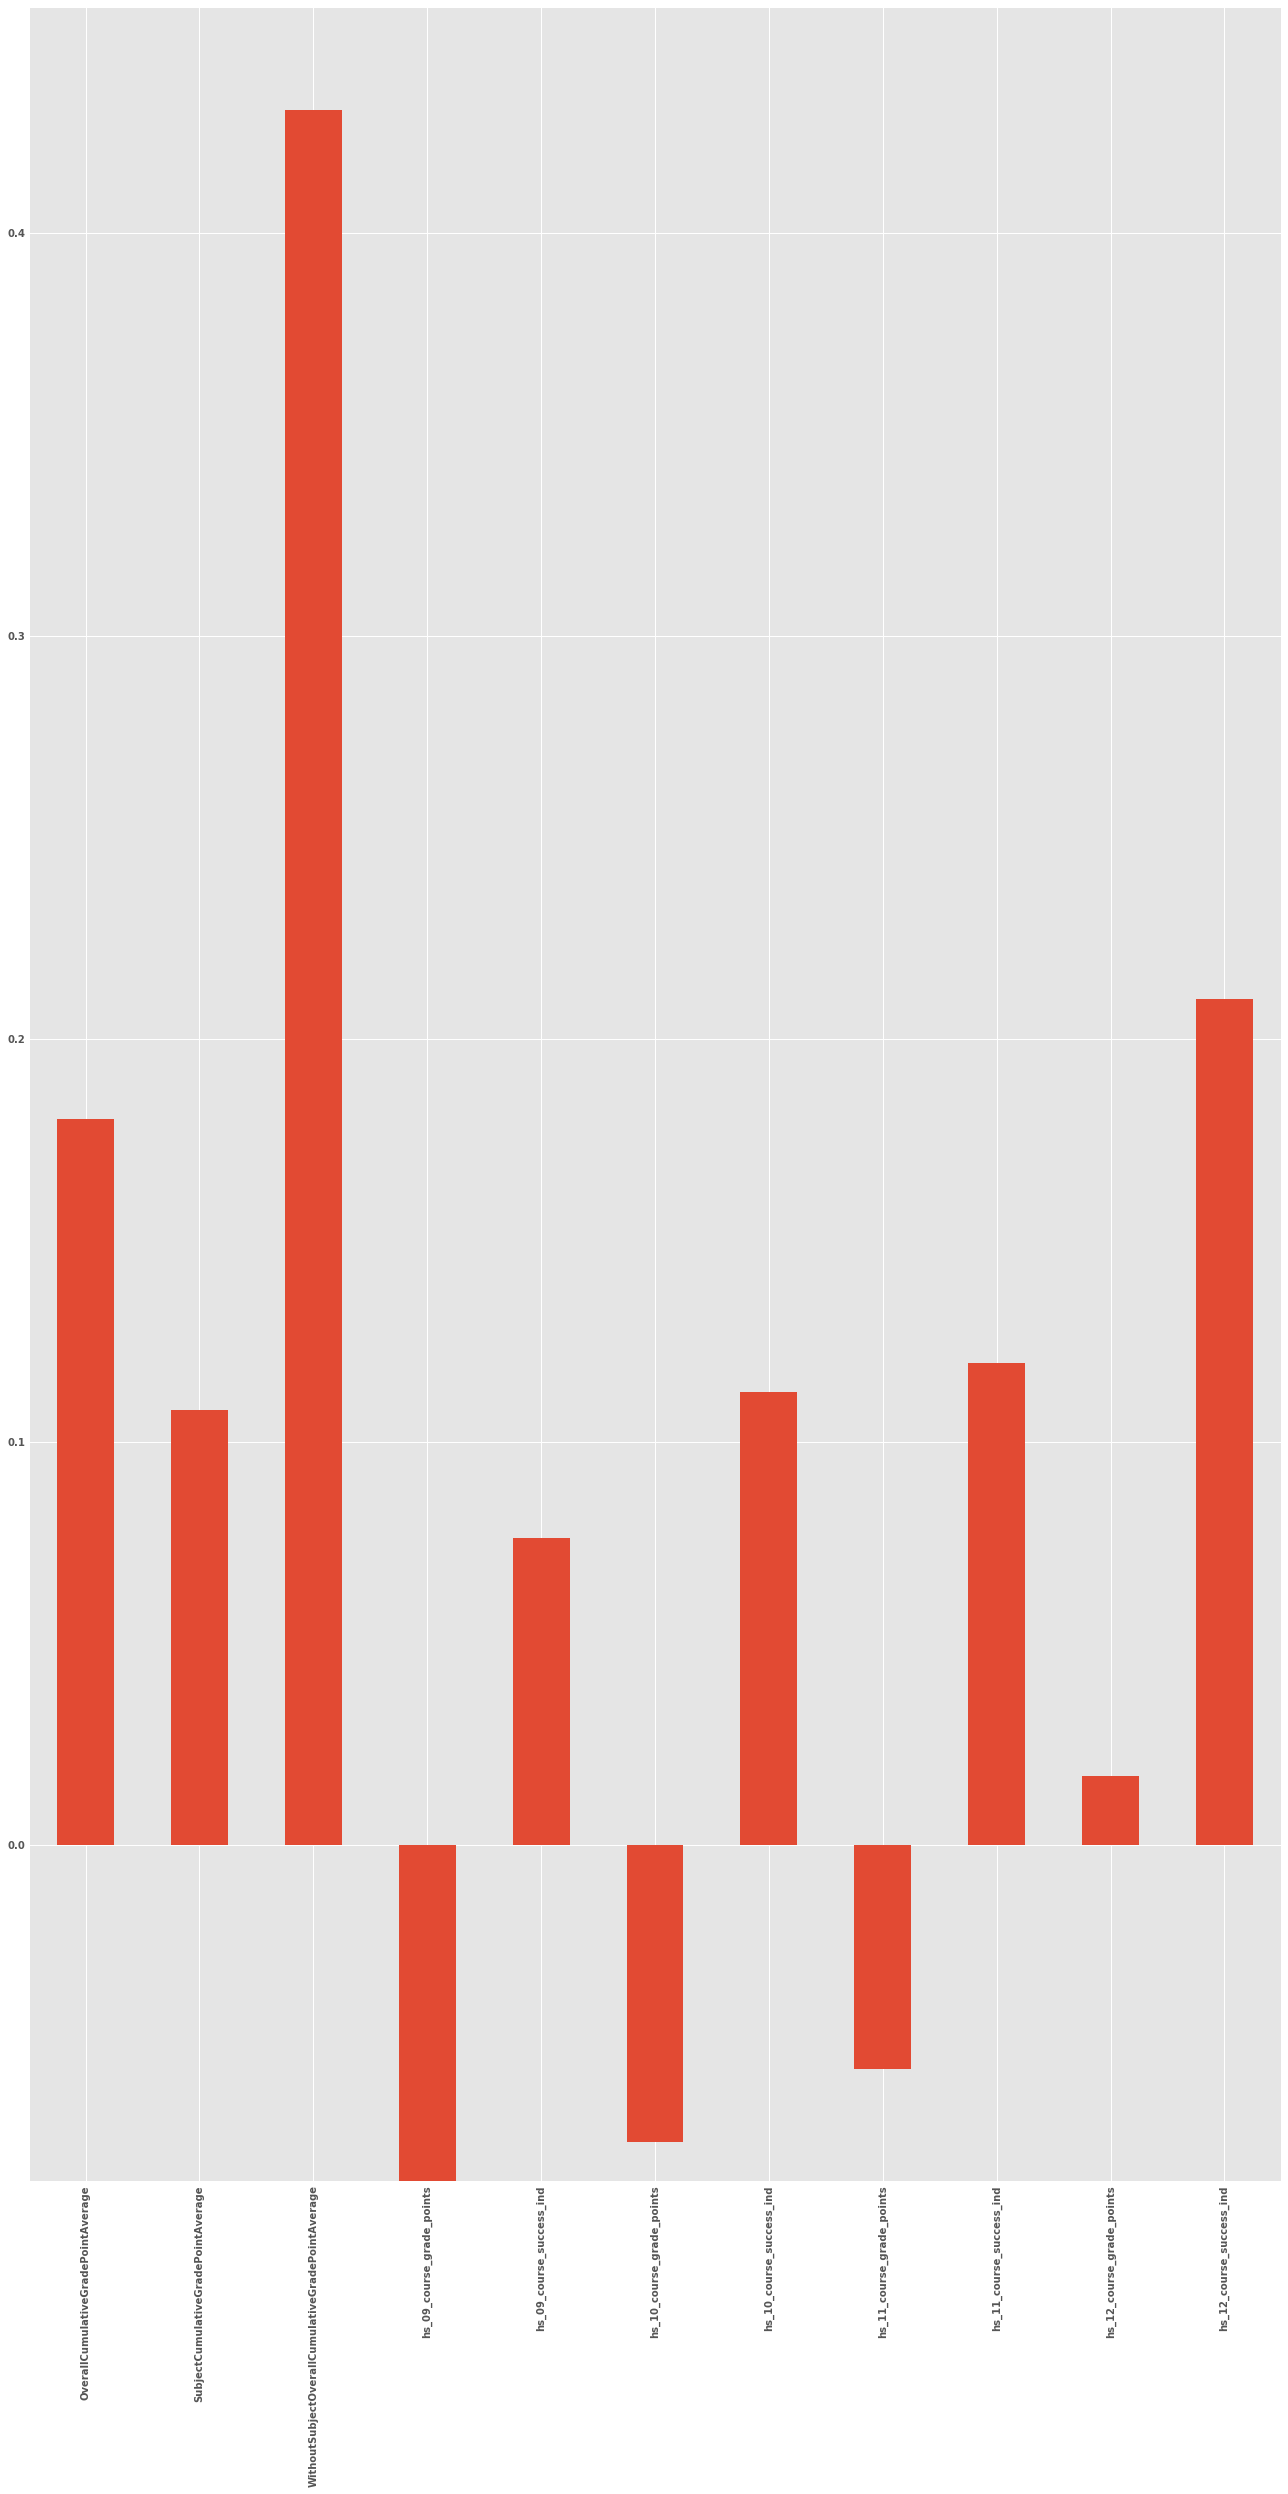

In [44]:
from matplotlib import pyplot as plt
%matplotlib inline
zip_vars = zip(rf_clf.feature_importances_,X.columns) # combine attributes
zip_vars=sorted(zip_vars) # sort them 
for coef, name in zip_vars:
    print(name, 'has importance of', coef)
    
plt.style.use('ggplot')

weights.plot(kind='bar',figsize=(20,40))
plt.show()

accuracy: 0.652
[[ 673  608]
 [ 436 1283]]
precision: [0.60685302 0.678477  ]
recall: [0.5253708  0.74636417]
fscore: [0.56317992 0.71080332]
support: [1281 1719]
accuracy: 0.673
[[ 678  559]
 [ 422 1341]]
precision: [0.61636364 0.70578947]
recall: [0.54810024 0.76063528]
fscore: [0.58023107 0.73218673]
support: [1237 1763]
accuracy: 0.651
[[ 639  633]
 [ 414 1314]]
precision: [0.60683761 0.67488444]
recall: [0.50235849 0.76041667]
fscore: [0.54967742 0.71510204]
support: [1272 1728]
accuracy: 0.6463333333333333
[[ 691  603]
 [ 458 1248]]
precision: [0.60139252 0.67423015]
recall: [0.53400309 0.73153576]
fscore: [0.56569791 0.70171493]
support: [1294 1706]
accuracy: 0.662
[[ 658  615]
 [ 399 1328]]
precision: [0.62251656 0.68347916]
recall: [0.51688924 0.76896352]
fscore: [0.56480687 0.72370572]
support: [1273 1727]
accuracy: 0.654
[[ 647  644]
 [ 394 1315]]
precision: [0.62151777 0.67126085]
recall: [0.50116189 0.76945582]
fscore: [0.55488851 0.717012  ]
support: [1291 1709]
accuracy:

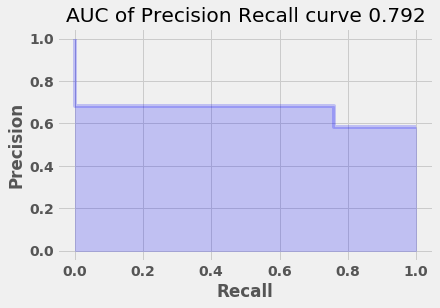

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

accuracy_runs = []

rf_clf = RandomForestClassifier(n_estimators = 150,criterion='entropy', max_depth = 10,min_samples_leaf=5,
                                min_samples_split=5,max_leaf_nodes = 62,
                                max_features= None)

for train_indices, test_indices in cv_object.split(X,y): 
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    X_train = X_m[train_indices]
    y_train = y_m[train_indices]
    y_train = np.ravel(y_train)
    X_test = X_m[test_indices]
    y_test = y_m[test_indices]
    y_test = np.ravel(y_test)
    
    rf_clf.fit(X_train,y_train)
    yhat = rf_clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    accuracy_runs.append(acc)
    print ('accuracy:', acc)
    precision, recall, fscore, support = score(y_test, yhat)
    
    cm = confusion_matrix(y_test, yhat)

    print (cm.view())

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
print ('average accuracy: ', np.array(accuracy_runs).mean())
y_test_probabilities = rf_clf.predict_proba(X_test)

#y_test_probabilities has shape = [n_samples, n_classes]

#y_test_predictions_high_precision = y_test_probabilities[:,1] > 0.7
#y_test_predictions_high_recall = y_test_probabilities[:,1] > 0.3

plt.style.use('fivethirtyeight')
precision, recall, _ = precision_recall_curve(y_test, y_test_probabilities[:,1]>.5)
area = mt.auc(recall, precision)
print("AUC of Precision Recall curve %1.3f" %area)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.title("AUC of Precision Recall curve %1.3f" %area)
plt.xlabel('Recall')
plt.ylabel('Precision')

hs_09_course_success_ind has importance of 0.0006821892484541454
hs_12_course_success_ind has importance of 0.001082410026202084
hs_10_course_success_ind has importance of 0.0012493076005774967
hs_11_course_success_ind has importance of 0.0013023749861957186
hs_10_course_grade_points has importance of 0.023777699739007344
hs_11_course_grade_points has importance of 0.02385724578703074
hs_09_course_grade_points has importance of 0.02501738210029827
hs_12_course_grade_points has importance of 0.03465311460720484
SubjectCumulativeGradePointAverage has importance of 0.08246934229269248
WithoutSubjectOverallCumulativeGradePointAverage has importance of 0.19693488930303693
OverallCumulativeGradePointAverage has importance of 0.6089740443093001


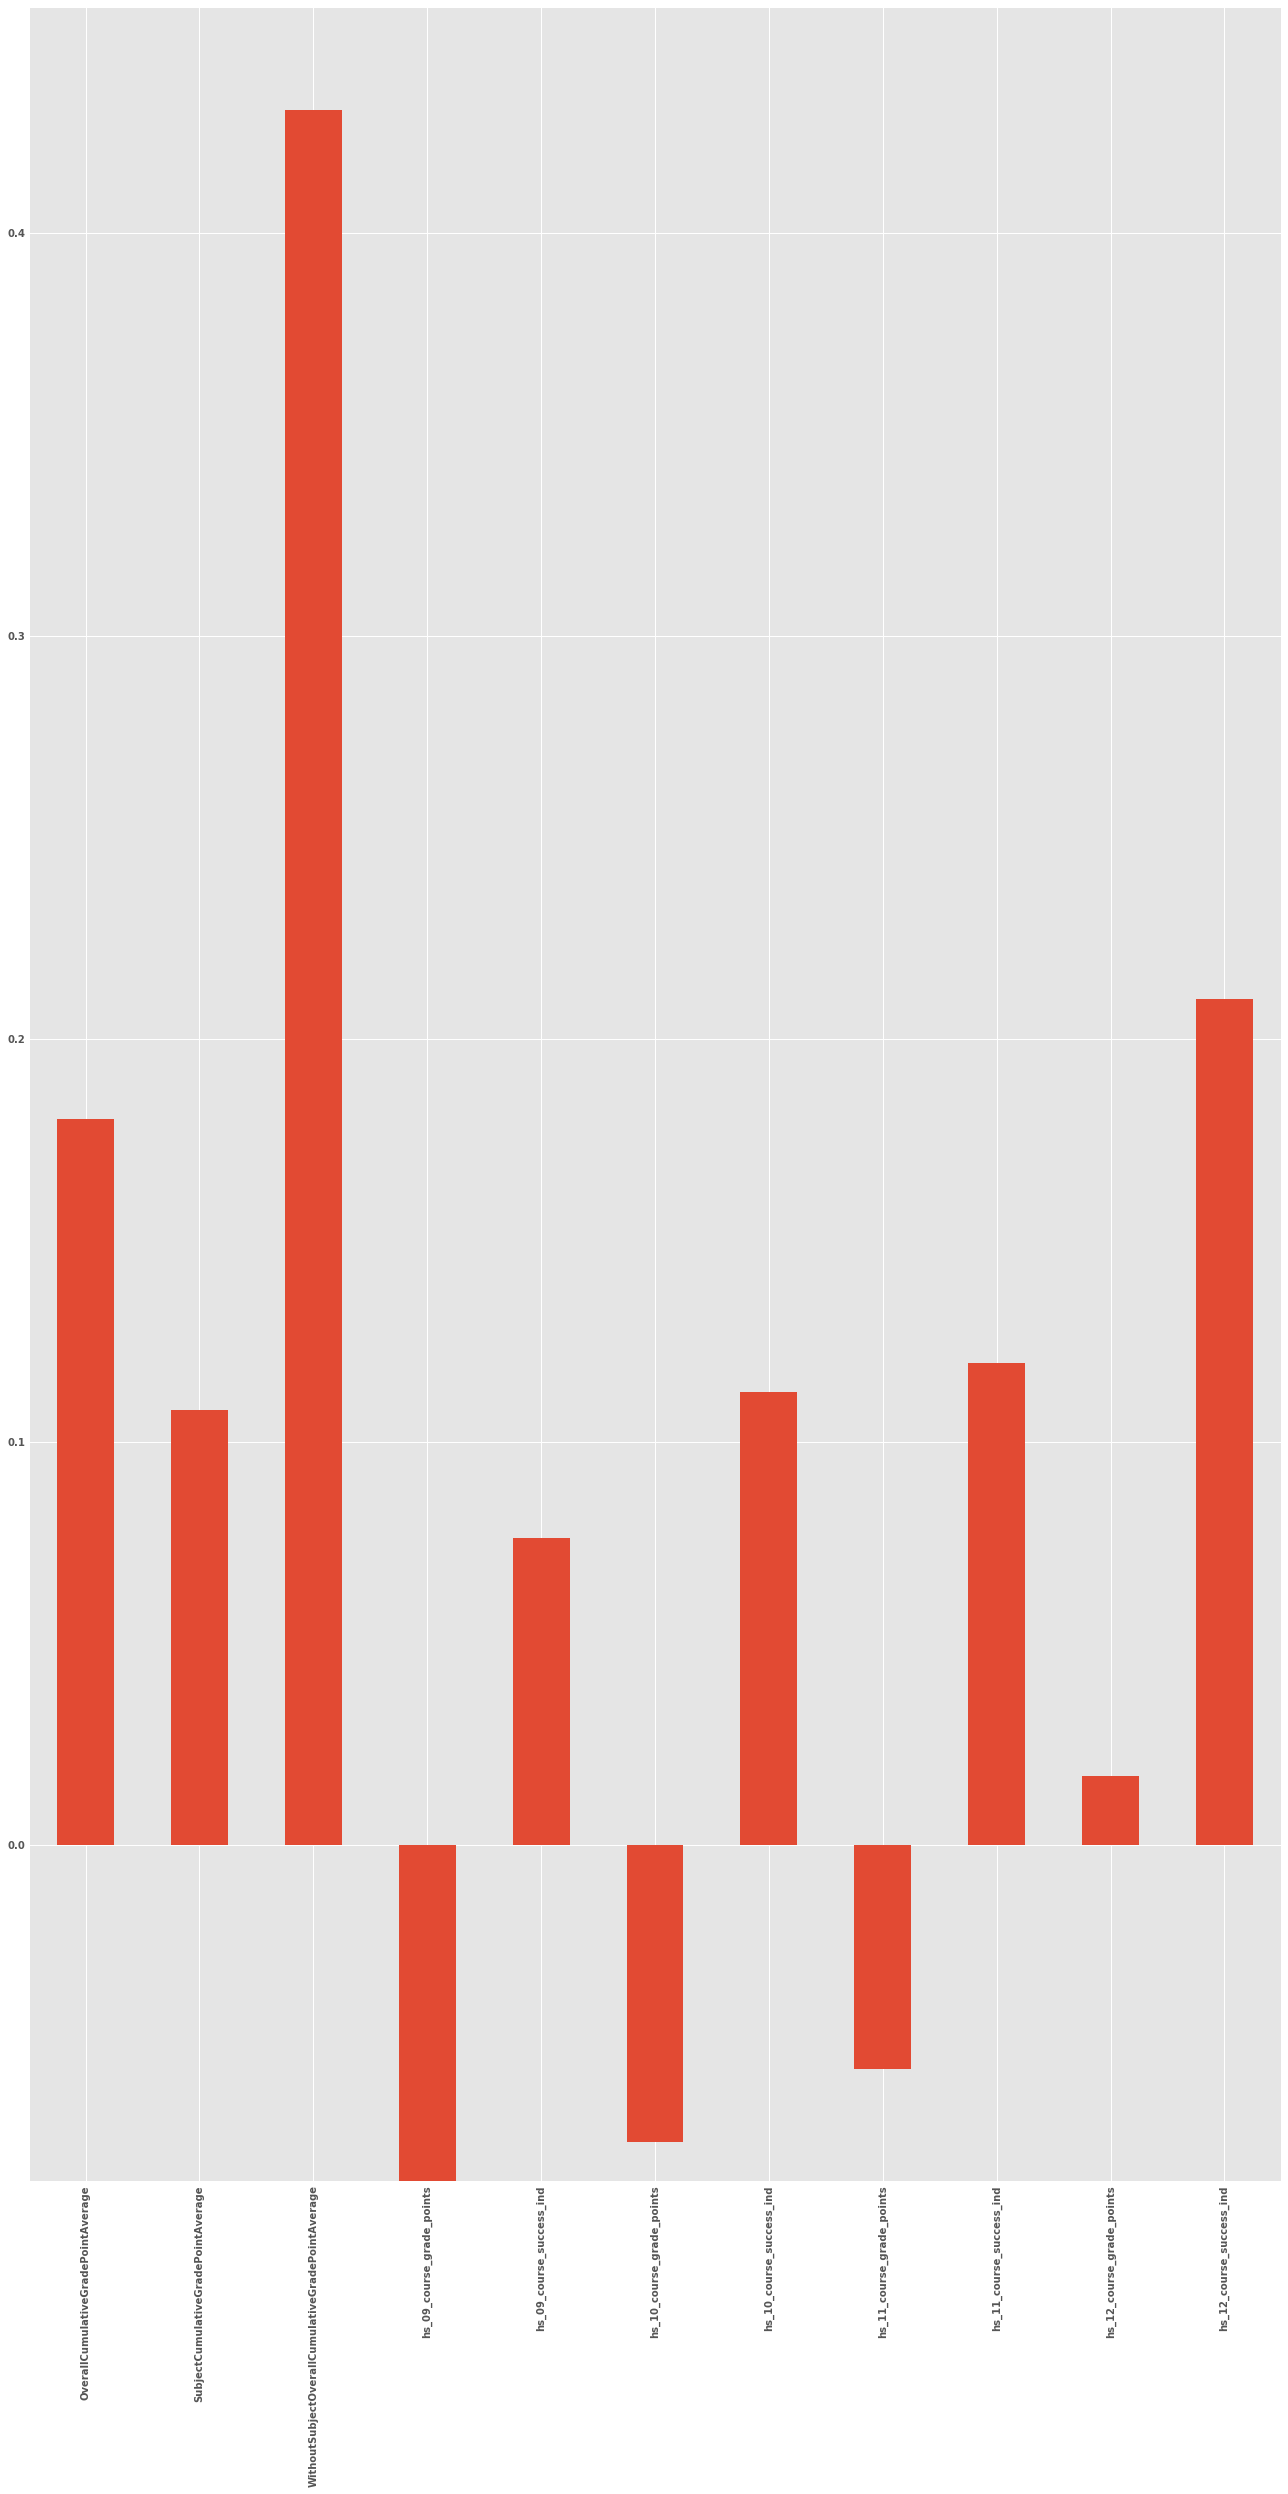

In [46]:
 from matplotlib import pyplot as plt
%matplotlib inline
zip_vars = zip(rf_clf.feature_importances_,X.columns) # combine attributes
zip_vars=sorted(zip_vars) # sort them 
for coef, name in zip_vars:
    print(name, 'has importance of', coef)
    
plt.style.use('ggplot')

weights.plot(kind='bar',figsize=(20,40))
plt.show()

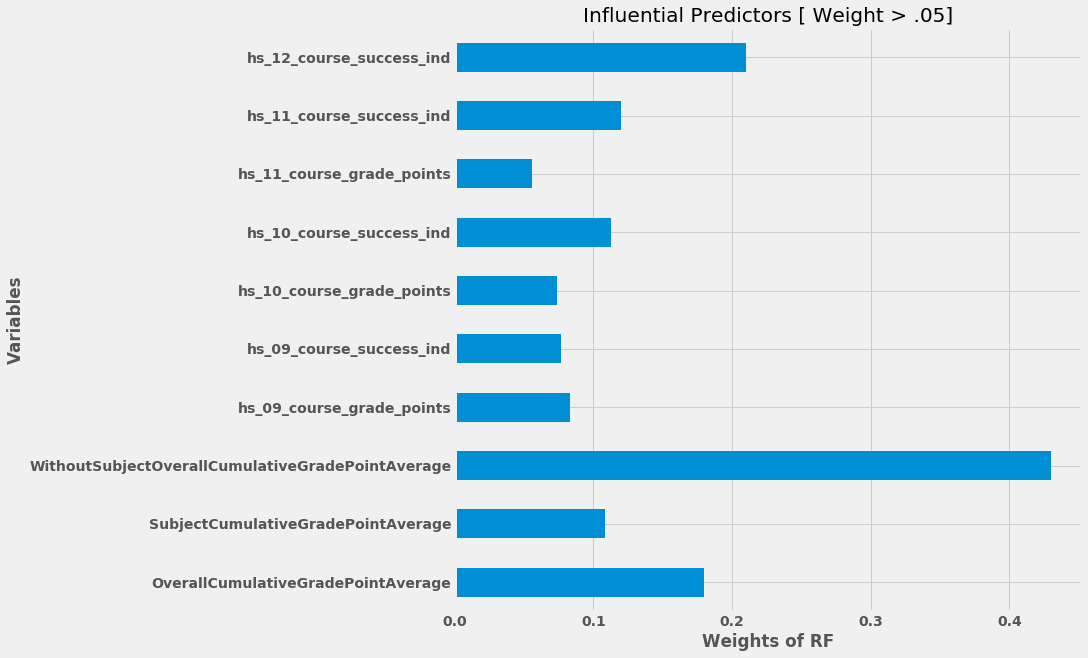

In [47]:
import math
weights2 = weights[abs(weights) > .05]
weights2 = abs(weights2)
weights2.sort_values()

# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
weights2.plot.barh(figsize=(10,10))
plt.title("Influential Predictors [ Weight > .05]")
plt.xlabel('Weights of RF')
plt.ylabel('Variables')

plt.show()